In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn import dummy

# Sklearn regression model evaluation functions
from sklearn.metrics import mean_absolute_error as MAE
from math import sqrt
from sklearn.metrics import r2_score

pd.set_option('display.max_rows', 200)

In [2]:
data=pd.read_csv("Data_cleaned_2016_Building_Energy_Benchmarking.csv",index_col=0)

In [3]:
data.head()

Campus  NonResidential  Age_Built  AgeBuilt_classe  \
OSEBuildingID                                                       
1                   0               1         95                3   
2                   0               1         26                1   
3                   0               1         53                2   
5                   0               1         96                3   
8                   0               1         42                1   

               NumberofBuildings  NumberofFloors_classe  PropertyGFATotal_log  \
OSEBuildingID                                                                   
1                            1.0                      3             11.390023   
2                            1.0                      3             11.547974   
3                            1.0                      3             13.770629   
5                            1.0                      3             11.023878   
8                            1.0                      3             12.075856   

               PropertyGFAParking_log  TotalPropertyUseTypes  \
OSEBuildingID                                                  
1                            0.000000                      1   
2                            9.620129                      3   
3                           12.189532                      1   
5                            0.000000                      1   
8                           11.034906                      3   

              PrimaryPropertyType  LargestPropertyUseTypeGFA_rel  \
OSEBuildingID                                                      
1                           Hotel                       1.000000   
2                           Hotel                       0.809918   
3                           Hotel                       0.791220   
5                           Hotel                       1.000000   
8                           Hotel                       0.703070   

               SecondLargestPropertyUseTypeGFA_rel  \
OSEBuildingID                                        
1                                         0.000000   
2                                         0.145453   
3                                         0.000000   
5                                         0.000000   
8                                         0.387339   

               ThirdLargestPropertyUseTypeGFA_rel  NaturalGas(kBtu)_bin  \
OSEBuildingID                                                             
1                                        0.000000                     1   
2                                        0.044629                     1   
3                                        0.000000                     1   
5                                        0.000000                     1   
8                                        0.000000                     1   

               SteamUse(kBtu)_bin  ENERGYSTARScore  ENERGYSTARScore_imputed  \
OSEBuildingID                                                                 
1                               1             60.0                     60.0   
2                               0             61.0                     61.0   
3                               1             43.0                     43.0   
5                               1             56.0                     56.0   
8                               0             75.0                     75.0   

               SiteEnergyUse(kBtu)  TotalGHGEmissions  
OSEBuildingID                                          
1                        7226362.5             249.98  
2                        8387933.0             295.86  
3                       72587024.0            2089.28  
5                        6794584.0             286.43  
8                       14172606.0             505.01

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 1 to 50226
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Campus                               1489 non-null   int64  
 1   NonResidential                       1489 non-null   int64  
 2   Age_Built                            1489 non-null   int64  
 3   AgeBuilt_classe                      1489 non-null   int64  
 4   NumberofBuildings                    1489 non-null   float64
 5   NumberofFloors_classe                1489 non-null   int64  
 6   PropertyGFATotal_log                 1489 non-null   float64
 7   PropertyGFAParking_log               1489 non-null   float64
 8   TotalPropertyUseTypes                1489 non-null   int64  
 9   PrimaryPropertyType                  1489 non-null   object 
 10  LargestPropertyUseTypeGFA_rel        1489 non-null   float64
 11  SecondLargestPropertyUseTypeG

# Selection des variables pour le modèle

In [5]:
X=data.drop(columns=['Age_Built','SiteEnergyUse(kBtu)','TotalGHGEmissions','ENERGYSTARScore','ENERGYSTARScore_imputed'],axis=1)
y=pd.DataFrame()
y['TotalGHGEmissions']=data['TotalGHGEmissions']

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 1 to 50226
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Campus                               1489 non-null   int64  
 1   NonResidential                       1489 non-null   int64  
 2   AgeBuilt_classe                      1489 non-null   int64  
 3   NumberofBuildings                    1489 non-null   float64
 4   NumberofFloors_classe                1489 non-null   int64  
 5   PropertyGFATotal_log                 1489 non-null   float64
 6   PropertyGFAParking_log               1489 non-null   float64
 7   TotalPropertyUseTypes                1489 non-null   int64  
 8   PrimaryPropertyType                  1489 non-null   object 
 9   LargestPropertyUseTypeGFA_rel        1489 non-null   float64
 10  SecondLargestPropertyUseTypeGFA_rel  1489 non-null   float64
 11  ThirdLargestPropertyUseTypeGF

In [7]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [8]:
print("X_train dimension: ", X_train.shape)
print("y_train dimension: ", y_train.shape)
print("X_test dimension: ", X_test.shape)
print("y_test dimension: ", y_test.shape)

X_train dimension:  (1191, 14)
y_train dimension:  (1191, 1)
X_test dimension:  (298, 14)
y_test dimension:  (298, 1)


## Variables 'PrimaryPropertyType'

In [9]:
data.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office', 'Medical Office',
       'Retail Store', 'Hospital', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant'], dtype=object)

In [10]:
y_train_df=pd.DataFrame(y_train)
train_df=pd.concat([X_train, y_train_df], axis=1, join='inner')
train_df.head()

Campus  NonResidential  AgeBuilt_classe  NumberofBuildings  \
OSEBuildingID                                                               
803                 0               1                3                1.0   
24479               0               1                2                1.0   
50204               0               1                2                1.0   
23040               0               1                3                1.0   
50198               0               1                0                1.0   

               NumberofFloors_classe  PropertyGFATotal_log  \
OSEBuildingID                                                
803                                0             11.351900   
24479                              0             10.398885   
50204                              0              9.331318   
23040                              1             10.668397   
50198                              0              9.366147   

               PropertyGFAParking_log  TotalPropertyUseTypes  \
OSEBuildingID                                                  
803                               0.0                      1   
24479                             0.0                      2   
50204                             0.0                      1   
23040                             0.0                      1   
50198                             0.0                      1   

                       PrimaryPropertyType  LargestPropertyUseTypeGFA_rel  \
OSEBuildingID                                                               
803            Small- and Mid-Sized Office                       0.957710   
24479          Supermarket / Grocery Store                       1.067638   
50204                                Other                       1.000000   
23040                          K-12 School                       0.498080   
50198                                Other                       1.000000   

               SecondLargestPropertyUseTypeGFA_rel  \
OSEBuildingID                                        
803                                            0.0   
24479                                          0.0   
50204                                          0.0   
23040                                          0.0   
50198                                          0.0   

               ThirdLargestPropertyUseTypeGFA_rel  NaturalGas(kBtu)_bin  \
OSEBuildingID                                                             
803                                           0.0                     1   
24479                                         0.0                     1   
50204                                         0.0                     1   
23040                                         0.0                     1   
50198                                         0.0                     1   

               SteamUse(kBtu)_bin  TotalGHGEmissions  
OSEBuildingID                                         
803                             0             166.13  
24479                           0             219.93  
50204                           0              14.37  
23040                           0              42.96  
50198                           0              29.18

In [11]:
y_test_df=pd.DataFrame(y_test)
test_df=pd.concat([X_test, y_test_df], axis=1, join='inner')
test_df.head()

Campus  NonResidential  AgeBuilt_classe  NumberofBuildings  \
OSEBuildingID                                                               
22962               0               1                1                1.0   
503                 0               1                0                1.0   
492                 0               1                1                1.0   
23056               0               1                4                1.0   
24178               0               1                0                1.0   

               NumberofFloors_classe  PropertyGFATotal_log  \
OSEBuildingID                                                
22962                              0             11.239882   
503                                0             11.054471   
492                                2             11.373617   
23056                              1             10.208948   
24178                              2             10.340096   

               PropertyGFAParking_log  TotalPropertyUseTypes  \
OSEBuildingID                                                  
22962                       10.214935                      1   
503                          0.000000                      1   
492                         10.268165                      2   
23056                        0.000000                      1   
24178                        0.000000                      2   

                       PrimaryPropertyType  LargestPropertyUseTypeGFA_rel  \
OSEBuildingID                                                               
22962          Small- and Mid-Sized Office                       1.000000   
503            Supermarket / Grocery Store                       1.000000   
492            Small- and Mid-Sized Office                       0.668946   
23056                                Other                       1.000000   
24178                   Mixed Use Property                       0.378991   

               SecondLargestPropertyUseTypeGFA_rel  \
OSEBuildingID                                        
22962                                     0.000000   
503                                       0.000000   
492                                       0.331054   
23056                                     0.000000   
24178                                     0.378991   

               ThirdLargestPropertyUseTypeGFA_rel  NaturalGas(kBtu)_bin  \
OSEBuildingID                                                             
22962                                         0.0                     0   
503                                           0.0                     0   
492                                           0.0                     0   
23056                                         0.0                     1   
24178                                         0.0                     0   

               SteamUse(kBtu)_bin  TotalGHGEmissions  
OSEBuildingID                                         
22962                           0              17.24  
503                             0              45.47  
492                             0              20.86  
23056                           0              32.58  
24178                           0               6.41

In [12]:
from category_encoders.target_encoder import TargetEncoder
encoder=TargetEncoder()
#on fit 'PrimaryPropertyType' avec les valeurs de train_df['SiteEnergyUse(kBtu)']
encoder.fit(train_df['PrimaryPropertyType'],train_df['TotalGHGEmissions'])
#
train_df['PrimaryPropertyType_encoded']=encoder.transform(train_df['PrimaryPropertyType'])
test_df['PrimaryPropertyType_encoded']=encoder.transform(test_df['PrimaryPropertyType'])

In [13]:
train_df.head()

Campus  NonResidential  AgeBuilt_classe  NumberofBuildings  \
OSEBuildingID                                                               
803                 0               1                3                1.0   
24479               0               1                2                1.0   
50204               0               1                2                1.0   
23040               0               1                3                1.0   
50198               0               1                0                1.0   

               NumberofFloors_classe  PropertyGFATotal_log  \
OSEBuildingID                                                
803                                0             11.351900   
24479                              0             10.398885   
50204                              0              9.331318   
23040                              1             10.668397   
50198                              0              9.366147   

               PropertyGFAParking_log  TotalPropertyUseTypes  \
OSEBuildingID                                                  
803                               0.0                      1   
24479                             0.0                      2   
50204                             0.0                      1   
23040                             0.0                      1   
50198                             0.0                      1   

                       PrimaryPropertyType  LargestPropertyUseTypeGFA_rel  \
OSEBuildingID                                                               
803            Small- and Mid-Sized Office                       0.957710   
24479          Supermarket / Grocery Store                       1.067638   
50204                                Other                       1.000000   
23040                          K-12 School                       0.498080   
50198                                Other                       1.000000   

               SecondLargestPropertyUseTypeGFA_rel  \
OSEBuildingID                                        
803                                            0.0   
24479                                          0.0   
50204                                          0.0   
23040                                          0.0   
50198                                          0.0   

               ThirdLargestPropertyUseTypeGFA_rel  NaturalGas(kBtu)_bin  \
OSEBuildingID                                                             
803                                           0.0                     1   
24479                                         0.0                     1   
50204                                         0.0                     1   
23040                                         0.0                     1   
50198                                         0.0                     1   

               SteamUse(kBtu)_bin  TotalGHGEmissions  \
OSEBuildingID                                          
803                             0             166.13   
24479                           0             219.93   
50204                           0              14.37   
23040                           0              42.96   
50198                           0              29.18   

               PrimaryPropertyType_encoded  
OSEBuildingID                               
803                              41.418348  
24479                           230.297429  
50204                           186.854355  
23040                            92.871463  
50198                           186.854355

In [14]:
test_df.head(200)

Campus  NonResidential  AgeBuilt_classe  NumberofBuildings  \
OSEBuildingID                                                               
22962               0               1                1                1.0   
503                 0               1                0                1.0   
492                 0               1                1                1.0   
23056               0               1                4                1.0   
24178               0               1                0                1.0   
21353               0               1                4                1.0   
659                 0               1                0                1.0   
21177               0               1                1                1.0   
419                 1               0                4                1.0   
24018               0               1                4                1.0   
536                 0               1                2                1.0   
22883               0               1                2                1.0   
19858               0               1                1                1.0   
20050               0               1                2                1.0   
21140               0               1                1                1.0   
24225               0               1                3                1.0   
23419               0               1                1                1.0   
50207               0               1                4                1.0   
22585               0               1                0                1.0   
23566               0               1                4                1.0   
521                 0               1                0                1.0   
561                 0               1                0                1.0   
22252               0               1                2                1.0   
50226               0               1                3                1.0   
49865               0               1                0                1.0   
19774               0               1                2                1.0   
387                 0               1                2                1.0   
24539               0               1                1                1.0   
660                 0               1                3                1.0   
21212               0               1                2                1.0   
116                 0               1                0                1.0   
21425               0               1                2                1.0   
24538               0               1                1                1.0   
23743               0               1                3                1.0   
23768               0               1                4                1.0   
24180               0               1                1                1.0   
19613               0               1                1                1.0   
21119               0               1                3                1.0   
19928               0               1                0                1.0   
21442               0               1                0                1.0   
77                  0               1                0                1.0   
366                 0               1                2                0.0   
113                 0               1                1                0.0   
654                 0               1                1                1.0   
805                 0               1                1                1.0   
25847               0               1                4                1.0   
348                 0               1                2                1.0   
263                 0               1                0                1.0   
21401               0               1                3                1.0   
49867               0               1                0                1.0   
132        

In [15]:
pd.options.mode.chained_assignment = None  # default='warn'
print("Skewness 'PrimaryPropertyType_encoded' sur jeu de train avant log: {:.2f}".format(train_df['PrimaryPropertyType_encoded'].skew()))
X_train['PrimaryPropertyType_log']=np.log1p(train_df['PrimaryPropertyType_encoded'])
print("Skewness 'PrimaryPropertyType_encoded' sur jeu de train après log: {:.3f}".format(X_train['PrimaryPropertyType_log'].skew()))

print("Skewness 'PrimaryPropertyType_encoded' sur jeu de test avant log: {:.2f}".format(test_df['PrimaryPropertyType_encoded'].skew()))
X_test['PrimaryPropertyType_log']=np.log1p(test_df['PrimaryPropertyType_encoded'])
print("Skewness 'PrimaryPropertyType_encoded' sur jeu de test après log: {:.3f}".format(X_test['PrimaryPropertyType_log'].skew()))

X_train.drop('PrimaryPropertyType',axis=1,inplace=True)
X_test.drop('PrimaryPropertyType',axis=1,inplace=True)

Skewness 'PrimaryPropertyType_encoded' sur jeu de train avant log: 6.43
Skewness 'PrimaryPropertyType_encoded' sur jeu de train après log: 0.513
Skewness 'PrimaryPropertyType_encoded' sur jeu de test avant log: 6.17
Skewness 'PrimaryPropertyType_encoded' sur jeu de test après log: 0.522


In [16]:
X_train.head()

Campus  NonResidential  AgeBuilt_classe  NumberofBuildings  \
OSEBuildingID                                                               
803                 0               1                3                1.0   
24479               0               1                2                1.0   
50204               0               1                2                1.0   
23040               0               1                3                1.0   
50198               0               1                0                1.0   

               NumberofFloors_classe  PropertyGFATotal_log  \
OSEBuildingID                                                
803                                0             11.351900   
24479                              0             10.398885   
50204                              0              9.331318   
23040                              1             10.668397   
50198                              0              9.366147   

               PropertyGFAParking_log  TotalPropertyUseTypes  \
OSEBuildingID                                                  
803                               0.0                      1   
24479                             0.0                      2   
50204                             0.0                      1   
23040                             0.0                      1   
50198                             0.0                      1   

               LargestPropertyUseTypeGFA_rel  \
OSEBuildingID                                  
803                                 0.957710   
24479                               1.067638   
50204                               1.000000   
23040                               0.498080   
50198                               1.000000   

               SecondLargestPropertyUseTypeGFA_rel  \
OSEBuildingID                                        
803                                            0.0   
24479                                          0.0   
50204                                          0.0   
23040                                          0.0   
50198                                          0.0   

               ThirdLargestPropertyUseTypeGFA_rel  NaturalGas(kBtu)_bin  \
OSEBuildingID                                                             
803                                           0.0                     1   
24479                                         0.0                     1   
50204                                         0.0                     1   
23040                                         0.0                     1   
50198                                         0.0                     1   

               SteamUse(kBtu)_bin  PrimaryPropertyType_log  
OSEBuildingID                                               
803                             0                 3.747581  
24479                           0                 5.443704  
50204                           0                 5.235667  
23040                           0                 4.541926  
50198                           0                 5.235667

In [17]:
X_train.columns

Index(['Campus', 'NonResidential', 'AgeBuilt_classe', 'NumberofBuildings',
       'NumberofFloors_classe', 'PropertyGFATotal_log',
       'PropertyGFAParking_log', 'TotalPropertyUseTypes',
       'LargestPropertyUseTypeGFA_rel', 'SecondLargestPropertyUseTypeGFA_rel',
       'ThirdLargestPropertyUseTypeGFA_rel', 'NaturalGas(kBtu)_bin',
       'SteamUse(kBtu)_bin', 'PrimaryPropertyType_log'],
      dtype='object')

In [18]:
print("Skewness ytrain sur jeu de train avant log:{:.2f}".format(train_df['TotalGHGEmissions'].skew()))
y_train=np.log1p(y_train_df['TotalGHGEmissions'])
print("Skewness ytrain après log:{:.3f}".format(y_train.skew()))
print("Skewness ytest sur jeu de test avant log:{:.2f}".format(test_df['TotalGHGEmissions'].skew()))
y_test=np.log1p(y_test_df['TotalGHGEmissions'])
print("Skewness ytest après log:{:.3f}".format(y_test.skew()))

Skewness ytrain sur jeu de train avant log:12.09
Skewness ytrain après log:0.149
Skewness ytest sur jeu de test avant log:8.95
Skewness ytest après log:0.496


# Modèles lineaires

## Régression lineaire et comparaison avec approche naive

In [19]:
model = LinearRegression()

In [20]:
start_time = timeit.default_timer()
model.fit(X_train, y_train);
elapsed_fit = timeit.default_timer() - start_time

In [21]:
start_time = timeit.default_timer()
predictions_train=model.predict(X_train)
elapsed_train = timeit.default_timer() - start_time

In [22]:
start_time = timeit.default_timer()
predictions_test=model.predict(X_test)
elapsed_pred = timeit.default_timer() - start_time

In [23]:
print("MAE Score sur jeu de train: {:.3f}".format(MAE(y_train, predictions_train)))
print("R2 score sur jeu de train: {:.3f}".format(r2_score(y_train, predictions_train)))
print("MAE Score sur jeu de test: {:.3f}".format(MAE(y_test, predictions_test)))
print("R2 score sur jeu de test: {:.3f}".format(r2_score(y_test, predictions_test)))
print("Temps entrainement: {:.5f}s".format(elapsed_fit))
print("Temps prediction jeu de train: {:.5f}s".format(elapsed_train))
print("Temps prediction jeu de test: {:.5f}s".format(elapsed_pred))

MAE Score sur jeu de train: 0.656
R2 score sur jeu de train: 0.678
MAE Score sur jeu de test: 0.655
R2 score sur jeu de test: 0.659
Temps entrainement: 0.00904s
Temps prediction jeu de train: 0.00148s
Temps prediction jeu de test: 0.00146s


In [24]:
dum=dummy.DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred_dum = dum.predict(X_test)

# Evaluate
print("MAE Score sur jeu de test (dummy): {:.3f}".format(MAE(y_test, y_pred_dum)))
print("R2 score sur jeu de test (dummy): {:.3f}".format(r2_score(y_test, y_pred_dum)))

MAE Score sur jeu de test (dummy): 1.121
R2 score sur jeu de test (dummy): -0.002


Text(0.5, 1.0, 'Valeurs prédites vs valeurs réélles - Variable TotalGHGEmissions')

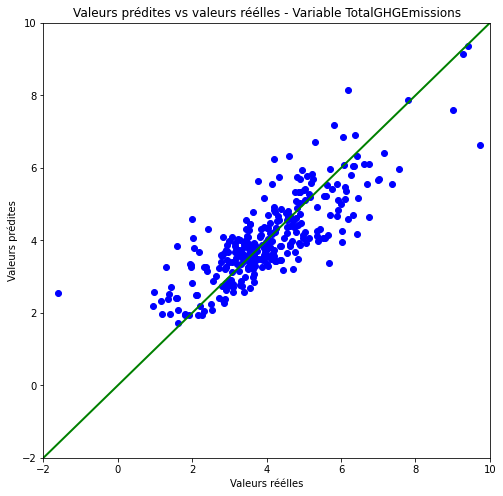

In [25]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions_test, color='b')
plt.axis([-2,10,-2,10])
plt.plot([-2,10], [-2,10], color='green',linewidth=2)
plt.xlabel("Valeurs réélles",fontsize=10)
plt.ylabel("Valeurs prédites",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Valeurs prédites vs valeurs réélles - Variable {}".format('TotalGHGEmissions'), fontsize=12)

## Régression lineaire avec validation croisée

In [26]:
%matplotlib inline
def style_negative(v, props=''):
    return props if v > 3 else None

import statsmodels.api as sm

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

#import plotly.express as px
import scipy.stats as stats
from category_encoders.target_encoder import TargetEncoder

r2_scores_train=[]
r2_scores_test=[]
mae_scores_train=[]
mae_scores_test=[]
fit_time=[]
train_time=[]
test_time=[]
idx=[]

cv = KFold(n_splits=5, random_state=42, shuffle=True)

cnt=0
for train_index, test_index in cv.split(X,y):
 
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

    pd.options.mode.chained_assignment = None  # default='warn'
    
    #encoding de la variable 'PrimaryPropertyType' pour chaque fold

    train_df=pd.concat([X_train, y_train], axis=1, join='inner')
    test_df=pd.concat([X_test, y_test], axis=1, join='inner')
    
    encoder=TargetEncoder()
    encoder.fit(train_df['PrimaryPropertyType'],train_df['TotalGHGEmissions'])
    
    train_df['PrimaryPropertyType_encoded']=encoder.transform(train_df['PrimaryPropertyType'])
    test_df['PrimaryPropertyType_encoded']=encoder.transform(test_df['PrimaryPropertyType']) 
    X_train['PrimaryPropertyType_log']=np.log1p(train_df['PrimaryPropertyType_encoded'])     
    X_test['PrimaryPropertyType_log']=np.log1p(test_df['PrimaryPropertyType_encoded'])
       
    X_train.drop('PrimaryPropertyType',axis=1,inplace=True)
    X_test.drop('PrimaryPropertyType',axis=1,inplace=True)
    y_train['TotalGHGEmissions_log']=np.log1p(train_df['TotalGHGEmissions'])
    y_test['TotalGHGEmissions_log']=np.log1p(test_df['TotalGHGEmissions'])
    y_train.drop('TotalGHGEmissions',axis=1,inplace=True)
    y_test.drop('TotalGHGEmissions',axis=1,inplace=True)
    
    #selection et apprentissage du modèle  
    model = LinearRegression()
    
    start_time = timeit.default_timer()
    model.fit(X_train, y_train)
    elapsed_fit = timeit.default_timer() - start_time
    fit_time.append(elapsed_fit)
    
    #évaluation sur le jeu d'apprentissage
    start_time = timeit.default_timer()
    predictions_train=model.predict(X_train)
    elapsed_train = timeit.default_timer() - start_time  
    r2_scores_train.append(r2_score(y_train,predictions_train))
    mae_scores_train.append(MAE(y_train,predictions_train))
    train_time.append(elapsed_train)
    
    #évaluation sur le jeu de test
    start_time = timeit.default_timer()
    predictions_test=model.predict(X_test)
    elapsed_test = timeit.default_timer() - start_time 
    r2_scores_test.append(r2_score(y_test,predictions_test))
    mae_scores_test.append(MAE(y_test,predictions_test))
    test_time.append(elapsed_test)
    
    #Evaluation z_score pour toutes les variables de X pour l'étude des outliers
    X_z_scores=pd.DataFrame()
    X_dataframe=pd.concat([X_train,X_test])
    y_dataframe=pd.concat([y_train,y_test])
    for col in X_dataframe.columns:
        col_zscore = col + '_zscore'
        X_z_scores[col_zscore]=stats.zscore(X_dataframe[col]) 
    X_z_scores['TotalGHGEmissions_log']=stats.zscore(y_dataframe['TotalGHGEmissions_log'])

    idx1=[]
    for i in X_z_scores.columns:
        idx1=idx1+list(X_z_scores.index[abs(X_z_scores[i])>3].values)
        
    idx1=np.unique(idx1)
    print('Nombre outliers identifiés avec z_score:',len(idx1))    
    X_outliers=X_z_scores.loc[idx1]

    #Cook distance pour toutes les variables de X pour l'étude des outliers
    idx=[]
    X_constant = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_constant)
    lr = model.fit()
    np.set_printoptions(suppress=True)
    influence = lr.get_influence()
    cooks = influence.cooks_distance

    #Création dataframe des individus avec distance Cook> 4/n
    cook_df = X_train
    cook_df['Cook_Distance']=cooks[0]
    idx=idx+list(cook_df.index[cook_df['Cook_Distance']>(4/cook_df.shape[0])]) 

    #Combinaison distance de Cook et z_scores
    idx2=[]
    for i in range(len(idx)):
        if idx[i] in idx1:
            idx2.append(idx[i])
            
    X_outliers_cook=X_outliers.loc[idx2]
    
    s2 = X_outliers_cook.style.applymap(style_negative, props='color:red;')
   
    print("Outliers identifiés avec Cook distance et z_score:")
    display(s2)
    
    Cook = pd.DataFrame(columns = ['Id', "Cook_'s Distance"])
    Cook['Id'] = X_train.index
    Cook["Cook's Distance"] = cooks[0]
    #Cook["Cook's Distance"] = C
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=Cook['Id'], y=Cook["Cook's Distance"],
                    mode='markers', name='markers'))
    fig.show()


print("MAE Score pour chaque fold sur jeu de train: \n",mae_scores_train)
print("MAE Score sur jeu de train: {:.3f}".format(np.mean(mae_scores_train)))
print("R2 score pour chaque fold sur jeu de train: \n",r2_scores_train)
print("R2 score sur jeu de train: {:.3f}".format(np.mean(r2_scores_train)))

print("MAE Score pour chaque fold sur jeu de test: \n",mae_scores_test)
print("MAE Score sur jeu de test:{:.3f}".format(np.mean(mae_scores_test)))
print("R2 score pour chaque fold sur jeu de test: \n",r2_scores_test)
print("R2 score sur jeu de test: {:.3f}".format(np.mean(r2_scores_test)))

print("Temps moyen entrainement: {:.5f}s".format(np.mean(fit_time)))
print("Temps moyen prediction jeu de train: {:.5f}s".format(np.mean(train_time)))
print("Temps moyen prediction jeu de test: {:.5f}s".format(np.mean(test_time)))  

Fold:0, Train set: 1191, Test set:298
Nombre outliers identifiés avec z_score: 222
Outliers identifiés avec Cook distance et z_score:


Fold:1, Train set: 1191, Test set:298
Nombre outliers identifiés avec z_score: 222
Outliers identifiés avec Cook distance et z_score:


Fold:2, Train set: 1191, Test set:298
Nombre outliers identifiés avec z_score: 222
Outliers identifiés avec Cook distance et z_score:


Fold:3, Train set: 1191, Test set:298
Nombre outliers identifiés avec z_score: 222
Outliers identifiés avec Cook distance et z_score:


Fold:4, Train set: 1192, Test set:297
Nombre outliers identifiés avec z_score: 222
Outliers identifiés avec Cook distance et z_score:


MAE Score pour chaque fold sur jeu de train: 
 [0.6562745626852537, 0.6540869667309841, 0.652058294459615, 0.6645749633393769, 0.657679327690377]
MAE Score sur jeu de train: 0.657
R2 score pour chaque fold sur jeu de train: 
 [0.6778734223227938, 0.6742602182088738, 0.6780150233021432, 0.6672443120161833, 0.6739529499486846]
R2 score sur jeu de train: 0.674
MAE Score pour chaque fold sur jeu de test: 
 [0.6550848070434755, 0.6757983581818695, 0.703135921735032, 0.629139025981508, 0.6621580635675778]
MAE Score sur jeu de test:0.665
R2 score pour chaque fold sur jeu de test: 
 [0.6589612795268398, 0.6692408435348902, 0.6346619458051129, 0.7062066955423072, 0.6589388841669694]
R2 score sur jeu de test: 0.666
Temps moyen entrainement: 0.00230s
Temps moyen prediction jeu de train: 0.00079s
Temps moyen prediction jeu de test: 0.00071s


In [27]:
Drop_list=[43,172,21482,24955,25452,40034,49699,49909,49967,50002]

display(data.loc[Drop_list])

X.drop(Drop_list,axis=0,inplace=True)
y.drop(Drop_list,axis=0,inplace=True)

Campus  NonResidential  Age_Built  AgeBuilt_classe  \
OSEBuildingID                                                       
43                  1               0         30                1   
172                 1               0         52                2   
21482               1               0        110                4   
24955               0               1         70                2   
25452               0               1         34                1   
40034               0               1         62                2   
49699               0               1         34                1   
49909               1               0         15                0   
49967               1               0        122                4   
50002               0               1          8                0   

               NumberofBuildings  NumberofFloors_classe  PropertyGFATotal_log  \
OSEBuildingID                                                                   
43                           1.0                      0             13.111982   
172                         27.0                      1             12.996963   
21482                        1.0                      1             10.141756   
24955                        1.0                      0              9.698982   
25452                        1.0                      1             10.452764   
40034                        1.0                      0              9.995702   
49699                        1.0                      1             10.729875   
49909                        4.0                      1             11.917437   
49967                      111.0                      0             16.047690   
50002                        1.0                      0             10.423739   

               PropertyGFAParking_log  TotalPropertyUseTypes  \
OSEBuildingID                                                  
43                           0.000000                      5   
172                          0.000000                      1   
21482                        0.000000                      3   
24955                        0.000000                      1   
25452                        9.642318                      3   
40034                        0.000000                      1   
49699                        0.000000                      1   
49909                        0.000000                      1   
49967                        0.000000                      1   
50002                        0.000000                      2   

                       PrimaryPropertyType  LargestPropertyUseTypeGFA_rel  \
OSEBuildingID                                                               
43                      Mixed Use Property                       1.529857   
172                             University                       1.095062   
21482                           Restaurant                       0.674310   
24955                  Distribution Center                       3.997791   
25452                   Mixed Use Property                       0.674760   
40034          Small- and Mid-Sized Office                       1.452054   
49699                            Warehouse                       6.426849   
49909                           University                       1.000000   
49967                           University                       1.000000   
50002                                Other                       2.484546   

               SecondLargestPropertyUseTypeGFA_rel  \
OSEBuildingID                                        
43                                        1.293221   
172                                       0.000000   
21482                                     0.253191   
24955                                     0.000000   
25452                                     0.567539   
40034                                     1.452054   
49699                                     0.000000   
49909                            

In [28]:
pd.set_option('display.max_rows', None)

In [29]:
r2_scores_train=[]
r2_scores_test=[]
mae_scores_train=[]
mae_scores_test=[]
fit_time=[]
train_time=[]
test_time=[]
model = LinearRegression()
idx=[]

cnt=0
for train_index, test_index in cv.split(X,y):
 
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

    pd.options.mode.chained_assignment = None  # default='warn'
    
    #encoding de la variable 'PrimaryPropertyType' pour chaque fold

    train_df=pd.concat([X_train, y_train], axis=1, join='inner')
    test_df=pd.concat([X_test, y_test], axis=1, join='inner')
    
    encoder=TargetEncoder()
    encoder.fit(train_df['PrimaryPropertyType'],train_df['TotalGHGEmissions'])
    
    train_df['PrimaryPropertyType_encoded']=encoder.transform(train_df['PrimaryPropertyType'])
    test_df['PrimaryPropertyType_encoded']=encoder.transform(test_df['PrimaryPropertyType']) 
    X_train['PrimaryPropertyType_log']=np.log1p(train_df['PrimaryPropertyType_encoded'])     
    X_test['PrimaryPropertyType_log']=np.log1p(test_df['PrimaryPropertyType_encoded'])
       
    X_train.drop('PrimaryPropertyType',axis=1,inplace=True)
    X_test.drop('PrimaryPropertyType',axis=1,inplace=True)
    y_train['TotalGHGEmissions_log']=np.log1p(train_df['TotalGHGEmissions'])
    y_test['TotalGHGEmissions_log']=np.log1p(test_df['TotalGHGEmissions'])
    y_train.drop('TotalGHGEmissions',axis=1,inplace=True)
    y_test.drop('TotalGHGEmissions',axis=1,inplace=True)
    
    #selection et apprentissage du modèle  
    model = LinearRegression()
    
    start_time = timeit.default_timer()
    model.fit(X_train, y_train)
    elapsed_fit = timeit.default_timer() - start_time
    fit_time.append(elapsed_fit)
    
    #évaluation sur le jeu d'apprentissage
    start_time = timeit.default_timer()
    predictions_train=model.predict(X_train)
    elapsed_train = timeit.default_timer() - start_time  
    r2_scores_train.append(r2_score(y_train,predictions_train))
    mae_scores_train.append(MAE(y_train,predictions_train))
    train_time.append(elapsed_train)
    
    #évaluation sur le jeu de test
    start_time = timeit.default_timer()
    predictions_test=model.predict(X_test)
    elapsed_test = timeit.default_timer() - start_time 
    r2_scores_test.append(r2_score(y_test,predictions_test))
    mae_scores_test.append(MAE(y_test,predictions_test))
    test_time.append(elapsed_test)


print("MAE Score pour chaque fold sur jeu de train: \n",mae_scores_train)
print("MAE Score sur jeu de train: {:.3f}".format(np.mean(mae_scores_train)))
print("R2 score pour chaque fold sur jeu de train: \n",r2_scores_train)
print("R2 score sur jeu de train: {:.3f}".format(np.mean(r2_scores_train)))

print("MAE Score pour chaque fold sur jeu de test: \n",mae_scores_test)
print("MAE Score sur jeu de test:{:.3f}".format(np.mean(mae_scores_test)))
print("R2 score pour chaque fold sur jeu de test: \n",r2_scores_test)
print("R2 score sur jeu de test: {:.3f}".format(np.mean(r2_scores_test)))

print("Temps moyen entrainement: {:.5f}s".format(np.mean(fit_time)))
print("Temps moyen prediction jeu de train: {:.5f}s".format(np.mean(train_time)))
print("Temps moyen prediction jeu de test: {:.5f}s".format(np.mean(test_time)))  

Fold:0, Train set: 1183, Test set:296
Fold:1, Train set: 1183, Test set:296
Fold:2, Train set: 1183, Test set:296
Fold:3, Train set: 1183, Test set:296
Fold:4, Train set: 1184, Test set:295
MAE Score pour chaque fold sur jeu de train: 
 [0.6469913007169171, 0.6378035401076901, 0.6445631448349635, 0.6485122898439757, 0.6422541961413744]
MAE Score sur jeu de train: 0.644
R2 score pour chaque fold sur jeu de train: 
 [0.6800269497876241, 0.6837699040155871, 0.6828409684512934, 0.6750054406101713, 0.6857146286783609]
R2 score sur jeu de train: 0.681
MAE Score pour chaque fold sur jeu de test: 
 [0.6438333086878503, 0.6707818690851342, 0.6629761978213107, 0.6197391641243023, 0.664234865395615]
MAE Score sur jeu de test:0.652
R2 score pour chaque fold sur jeu de test: 
 [0.6758825717910419, 0.6655891871544604, 0.6505408734150291, 0.7113999790797296, 0.6396785060004728]
R2 score sur jeu de test: 0.669
Temps moyen entrainement: 0.00188s
Temps moyen prediction jeu de train: 0.00067s
Temps moyen

Text(0.5, 1.0, 'Valeurs prédites vs valeurs réélles - Variable TotalGHGEmissions')

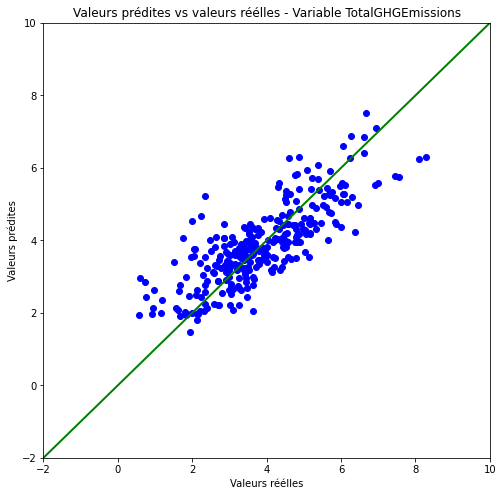

In [30]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions_test, color='b')
plt.axis([-2,10,-2,10])
plt.plot([-2,10], [-2,10], color='green',linewidth=2)
plt.xlabel("Valeurs réélles",fontsize=10)
plt.ylabel("Valeurs prédites",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Valeurs prédites vs valeurs réélles - Variable {}".format('TotalGHGEmissions'), fontsize=12)

In [31]:
X=data.drop(columns=['AgeBuilt_classe','SiteEnergyUse(kBtu)','TotalGHGEmissions','ENERGYSTARScore','ENERGYSTARScore_imputed'],axis=1)
X.drop(Drop_list,axis=0,inplace=True)
r2_scores_train=[]
r2_scores_test=[]
mae_scores_train=[]
mae_scores_test=[]
fit_time=[]
train_time=[]
test_time=[]
model = LinearRegression()
idx=[]

for train_index, test_index in cv.split(X,y):
 
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

    pd.options.mode.chained_assignment = None  # default='warn'
    
    #encoding de la variable 'PrimaryPropertyType' pour chaque fold

    train_df=pd.concat([X_train, y_train], axis=1, join='inner')
    test_df=pd.concat([X_test, y_test], axis=1, join='inner')
    
    encoder=TargetEncoder()
    encoder.fit(train_df['PrimaryPropertyType'],train_df['TotalGHGEmissions'])
    
    train_df['PrimaryPropertyType_encoded']=encoder.transform(train_df['PrimaryPropertyType'])
    test_df['PrimaryPropertyType_encoded']=encoder.transform(test_df['PrimaryPropertyType']) 
    X_train['PrimaryPropertyType_log']=np.log1p(train_df['PrimaryPropertyType_encoded'])     
    X_test['PrimaryPropertyType_log']=np.log1p(test_df['PrimaryPropertyType_encoded'])
       
    X_train.drop('PrimaryPropertyType',axis=1,inplace=True)
    X_test.drop('PrimaryPropertyType',axis=1,inplace=True)
    y_train['TotalGHGEmissions_log']=np.log1p(train_df['TotalGHGEmissions'])
    y_test['TotalGHGEmissions_log']=np.log1p(test_df['TotalGHGEmissions'])
    y_train.drop('TotalGHGEmissions',axis=1,inplace=True)
    y_test.drop('TotalGHGEmissions',axis=1,inplace=True)
    
    #selection et apprentissage du modèle  
    model = LinearRegression()
    
    start_time = timeit.default_timer()
    model.fit(X_train, y_train)
    elapsed_fit = timeit.default_timer() - start_time
    fit_time.append(elapsed_fit)
    
    #évaluation sur le jeu d'apprentissage
    start_time = timeit.default_timer()
    predictions_train=model.predict(X_train)
    elapsed_train = timeit.default_timer() - start_time  
    r2_scores_train.append(r2_score(y_train,predictions_train))
    mae_scores_train.append(MAE(y_train,predictions_train))
    train_time.append(elapsed_train)
    
    #évaluation sur le jeu de test
    start_time = timeit.default_timer()
    predictions_test=model.predict(X_test)
    elapsed_test = timeit.default_timer() - start_time 
    r2_scores_test.append(r2_score(y_test,predictions_test))
    mae_scores_test.append(MAE(y_test,predictions_test))
    test_time.append(elapsed_test)


print("MAE Score pour chaque fold sur jeu de train: \n",mae_scores_train)
print("MAE Score sur jeu de train: {:.3f}".format(np.mean(mae_scores_train)))
print("R2 score pour chaque fold sur jeu de train: \n",r2_scores_train)
print("R2 score sur jeu de train: {:.3f}".format(np.mean(r2_scores_train)))

print("MAE Score pour chaque fold sur jeu de test: \n",mae_scores_test)
print("MAE Score sur jeu de test: {:.3f}".format(np.mean(mae_scores_test)))
print("R2 score pour chaque fold sur jeu de test: \n",r2_scores_test)
print("R2 score sur jeu de test: {:.3f}".format(np.mean(r2_scores_test)))

print("Temps moyen entrainement: {:.5f}s".format(np.mean(fit_time)))
print("Temps moyen prediction jeu de train: {:.5f}s".format(np.mean(train_time)))
print("Temps moyen prediction jeu de test: {:.5f}s".format(np.mean(test_time)))  

#on definit le dictionnaire des scores pour la comparaison entre modèles

models_scores={}
models_scores['Regression lin. multivariée']=[np.mean(mae_scores_train),np.mean(mae_scores_test),np.mean(fit_time),np.mean(test_time)]

Fold:5, Train set: 1183, Test set:296
Fold:6, Train set: 1183, Test set:296
Fold:7, Train set: 1183, Test set:296
Fold:8, Train set: 1183, Test set:296
Fold:9, Train set: 1184, Test set:295
MAE Score pour chaque fold sur jeu de train: 
 [0.6473669484725241, 0.6379828386403881, 0.6445608731497707, 0.648944772538248, 0.6428405693143462]
MAE Score sur jeu de train: 0.644
R2 score pour chaque fold sur jeu de train: 
 [0.6797377900219972, 0.6836671528135547, 0.6827946383892111, 0.6747874014626081, 0.685540174629674]
R2 score sur jeu de train: 0.681
MAE Score pour chaque fold sur jeu de test: 
 [0.6436749321665809, 0.6718220659867413, 0.6638546300239325, 0.6192200840316973, 0.663711471590737]
MAE Score sur jeu de test: 0.652
R2 score pour chaque fold sur jeu de test: 
 [0.6762803578497316, 0.6651931795626136, 0.6499017240333453, 0.7115164440323611, 0.6395395142940201]
R2 score sur jeu de test: 0.668
Temps moyen entrainement: 0.00392s
Temps moyen prediction jeu de train: 0.00090s
Temps moyen 

Text(0.5, 1.0, 'Valeurs prédites vs valeurs réélles - Variable TotalGHGEmissions')

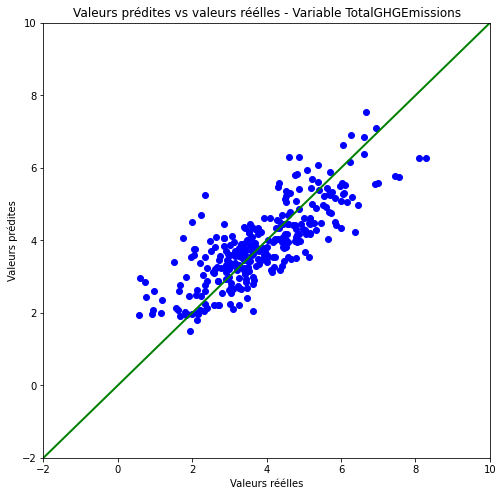

In [32]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions_test, color='b')
plt.axis([-2,10,-2,10])
plt.plot([-2,10], [-2,10], color='green',linewidth=2)
plt.xlabel("Valeurs réélles",fontsize=10)
plt.ylabel("Valeurs prédites",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Valeurs prédites vs valeurs réélles - Variable {}".format('TotalGHGEmissions'), fontsize=12)

## Régression lineaire avec régularisation 

### Régression Ridge

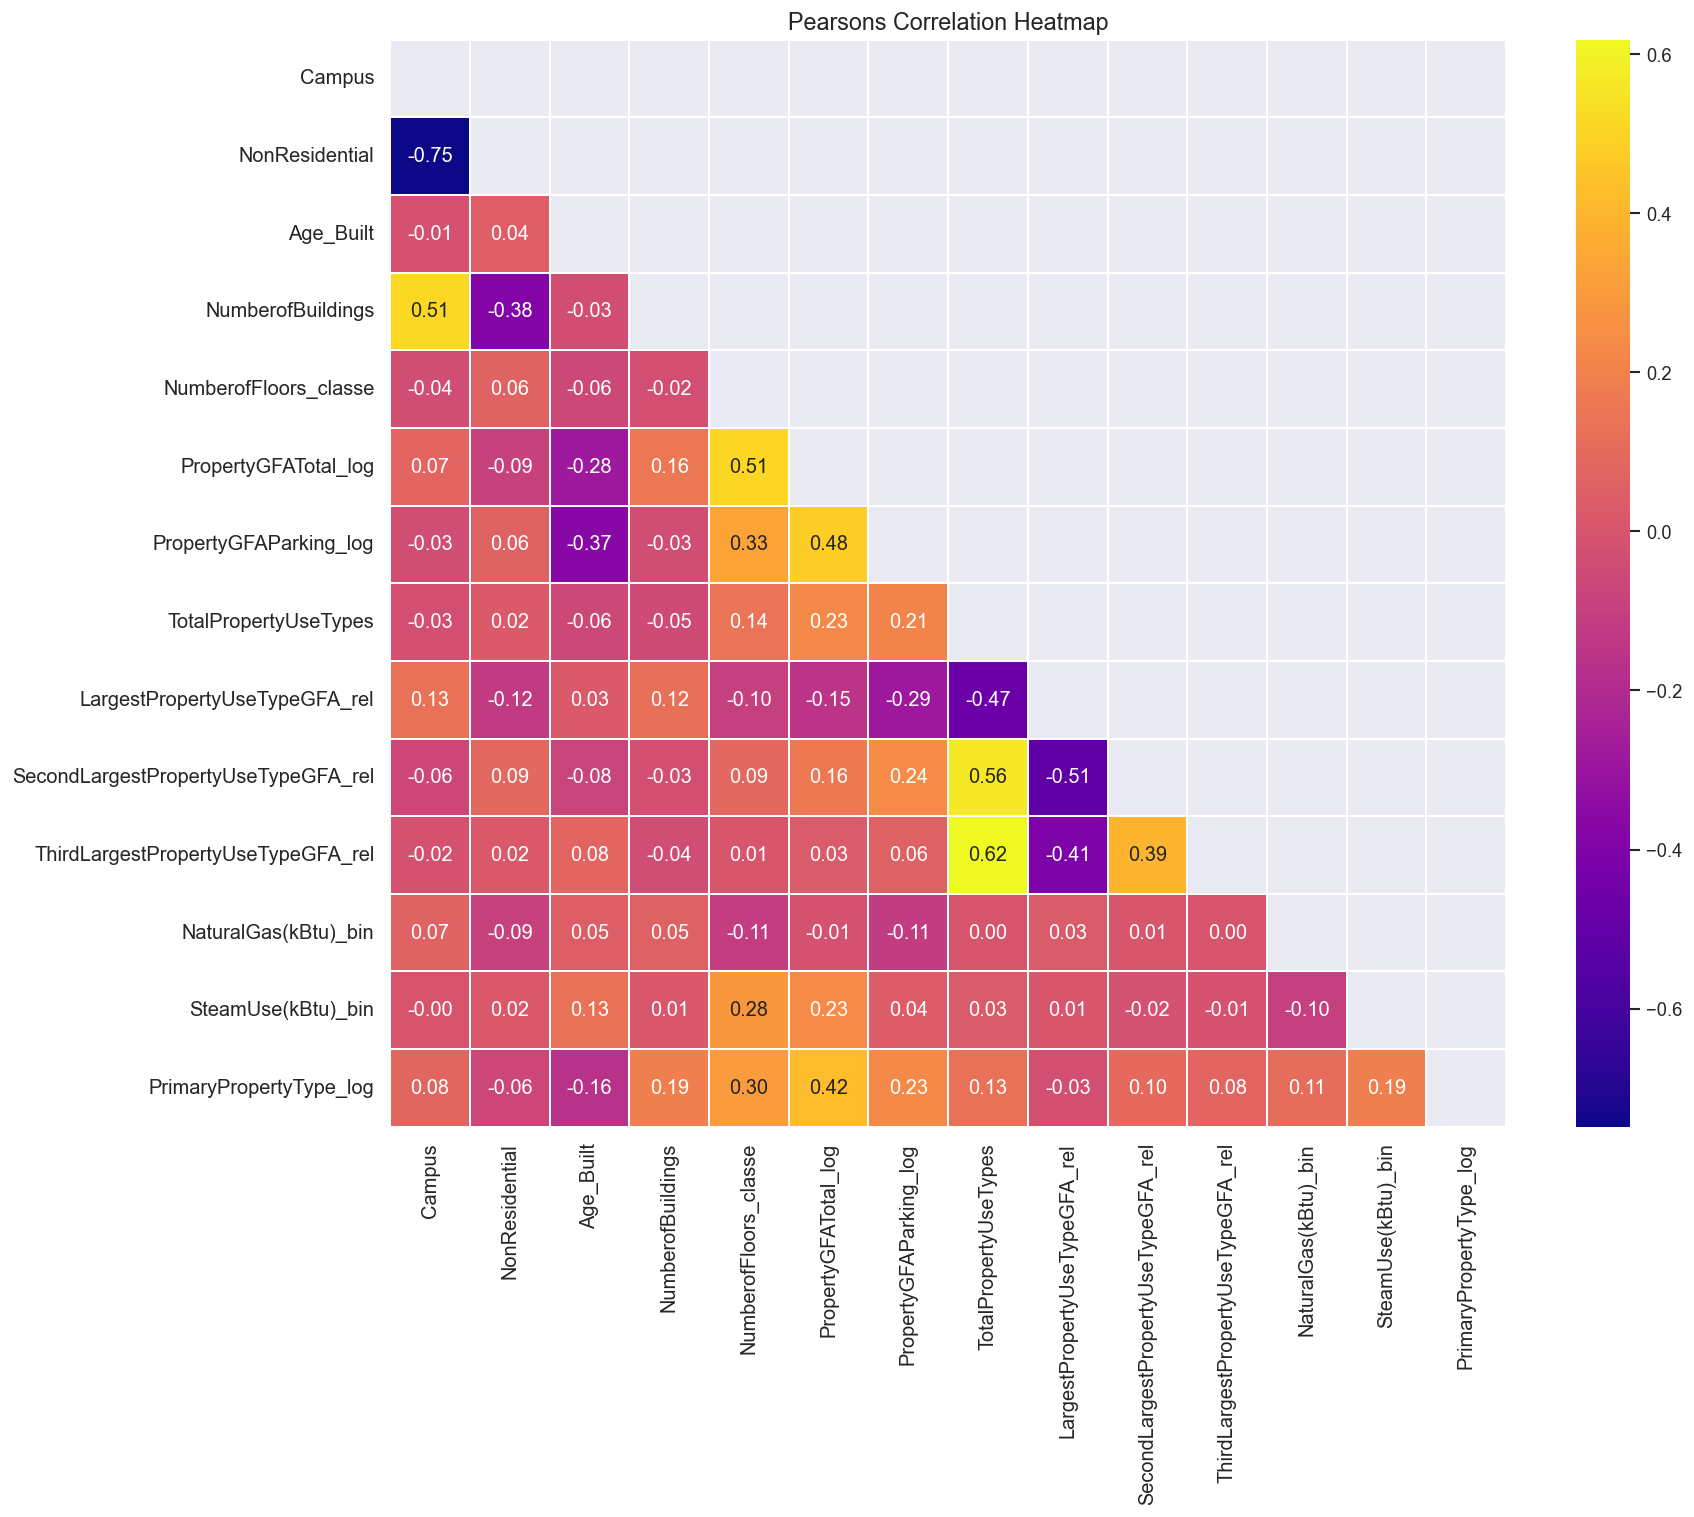

In [33]:
sns.set(font_scale=1) 
sns.set_style('darkgrid')
plt.figure(dpi = 120,figsize= (15,12))
mask = np.triu(np.ones_like(X_train.corr(),dtype = bool))
sns.heatmap(X_train.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
sns.set(font_scale=0.6)
plt.yticks(rotation = 0,fontsize=12)
plt.xticks(rotation = 90,fontsize=12)
plt.title('Pearsons Correlation Heatmap',fontsize= 14)
plt.show()

In [34]:
X_train.columns

Index(['Campus', 'NonResidential', 'Age_Built', 'NumberofBuildings',
       'NumberofFloors_classe', 'PropertyGFATotal_log',
       'PropertyGFAParking_log', 'TotalPropertyUseTypes',
       'LargestPropertyUseTypeGFA_rel', 'SecondLargestPropertyUseTypeGFA_rel',
       'ThirdLargestPropertyUseTypeGFA_rel', 'NaturalGas(kBtu)_bin',
       'SteamUse(kBtu)_bin', 'PrimaryPropertyType_log'],
      dtype='object')

In [35]:
from sklearn import linear_model
from sklearn.linear_model import RidgeCV

coefs = []
errors = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)

train_df=pd.concat([X_train, y_train], axis=1, join='inner')
test_df=pd.concat([X_test, y_test], axis=1, join='inner')

encoder=TargetEncoder()
encoder.fit(train_df['PrimaryPropertyType'],train_df['TotalGHGEmissions'])
    
train_df['PrimaryPropertyType_encoded']=encoder.transform(train_df['PrimaryPropertyType'])
test_df['PrimaryPropertyType_encoded']=encoder.transform(test_df['PrimaryPropertyType']) 
X_train['PrimaryPropertyType_log']=np.log(train_df['PrimaryPropertyType_encoded']+1)     
X_test['PrimaryPropertyType_log']=np.log(test_df['PrimaryPropertyType_encoded']+1)
       
X_train.drop('PrimaryPropertyType',axis=1,inplace=True)
X_test.drop('PrimaryPropertyType',axis=1,inplace=True)
y_train['TotalGHGEmissions_log']=np.log1p(train_df['TotalGHGEmissions'])
y_test['TotalGHGEmissions_log']=np.log1p(test_df['TotalGHGEmissions'])
y_train.drop('TotalGHGEmissions',axis=1,inplace=True)
y_test.drop('TotalGHGEmissions',axis=1,inplace=True)

y_train=np.ravel(y_train)

# liste de alphas à vérifier: 200 valeurs entre 10exp-2 et 10exp5
n_alphas = 200
alphas = np.logspace(-2, 5, n_alphas)
# on cherche le meillur alpha avec la validation croisée sur le jeu d'apprentissage
ridge_cv = RidgeCV(alphas=alphas,cv=None,store_cv_values=True)
# on entraine le modèle avec le meilleur alpha
start_time = timeit.default_timer()
ridge_cv.fit(X_train, y_train)
elapsed_fit = timeit.default_timer() - start_time 

start_time = timeit.default_timer()
predictions_train=ridge_cv.predict(X_train)
elapsed_train = timeit.default_timer() - start_time 

start_time = timeit.default_timer()
predictions_test=ridge_cv.predict(X_test)
elapsed_test = timeit.default_timer() - start_time 

alpha = ridge_cv.alpha_
print("Meilleur coefficient de régularisation:{:.3f}".format(alpha))
errors=np.resize(ridge_cv.cv_values_,(1176,200))
errors_mean=np.mean(errors,axis=0)

Meilleur coefficient de régularisation:3.697


In [36]:
#score du modèle
print("R2 Score sur jeu de train: {:.3f}".format(ridge_cv.score(X_train, y_train)))
print("R2 Score sur jeu de test: {:.3f}".format(ridge_cv.score(X_test, y_test)))
print("MAE Score sur jeu de train: {:.3f}".format(MAE(predictions_train,y_train)))
print("MAE Score sur jeu de test: {:.3f}".format(MAE(predictions_test,y_test)))
print("Temps entrainement: {:.5f}s".format(elapsed_fit))
print("Temps prediction jeu de train: {:.5f}s".format(elapsed_train))
print("Temps prediction jeu de test: {:.5f}s".format(elapsed_pred)) 

models_scores['Régression Ridge']=[MAE(predictions_train,y_train),MAE(predictions_test,y_test),elapsed_fit,elapsed_test]

R2 Score sur jeu de train: 0.679
R2 Score sur jeu de test: 0.677
MAE Score sur jeu de train: 0.648
MAE Score sur jeu de test: 0.642
Temps entrainement: 0.01341s
Temps prediction jeu de train: 0.00104s
Temps prediction jeu de test: 0.00146s


#### MSE en fonction de alpha

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

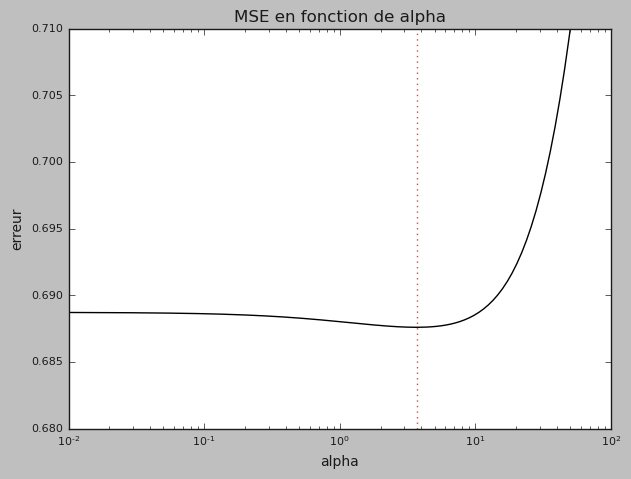

In [37]:
plt.style.use('classic')
fig=plt.figure(figsize=[7,5],dpi=100)
plt.plot(alphas,errors_mean,linewidth=1,color='black')
ymin=0.68
ymax=0.710
plt.xscale("log")
plt.title('MSE en fonction de alpha',fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('alpha',fontsize=10)
plt.ylabel('erreur',fontsize=10)
plt.xlim(0.01, 100)
plt.ylim(ymin,ymax )
plt.vlines(alpha,ymin=ymin,ymax=ymax,color='r',linestyle=":",linewidth=1)
plt

#### Chemin de régularisation des coefficients

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

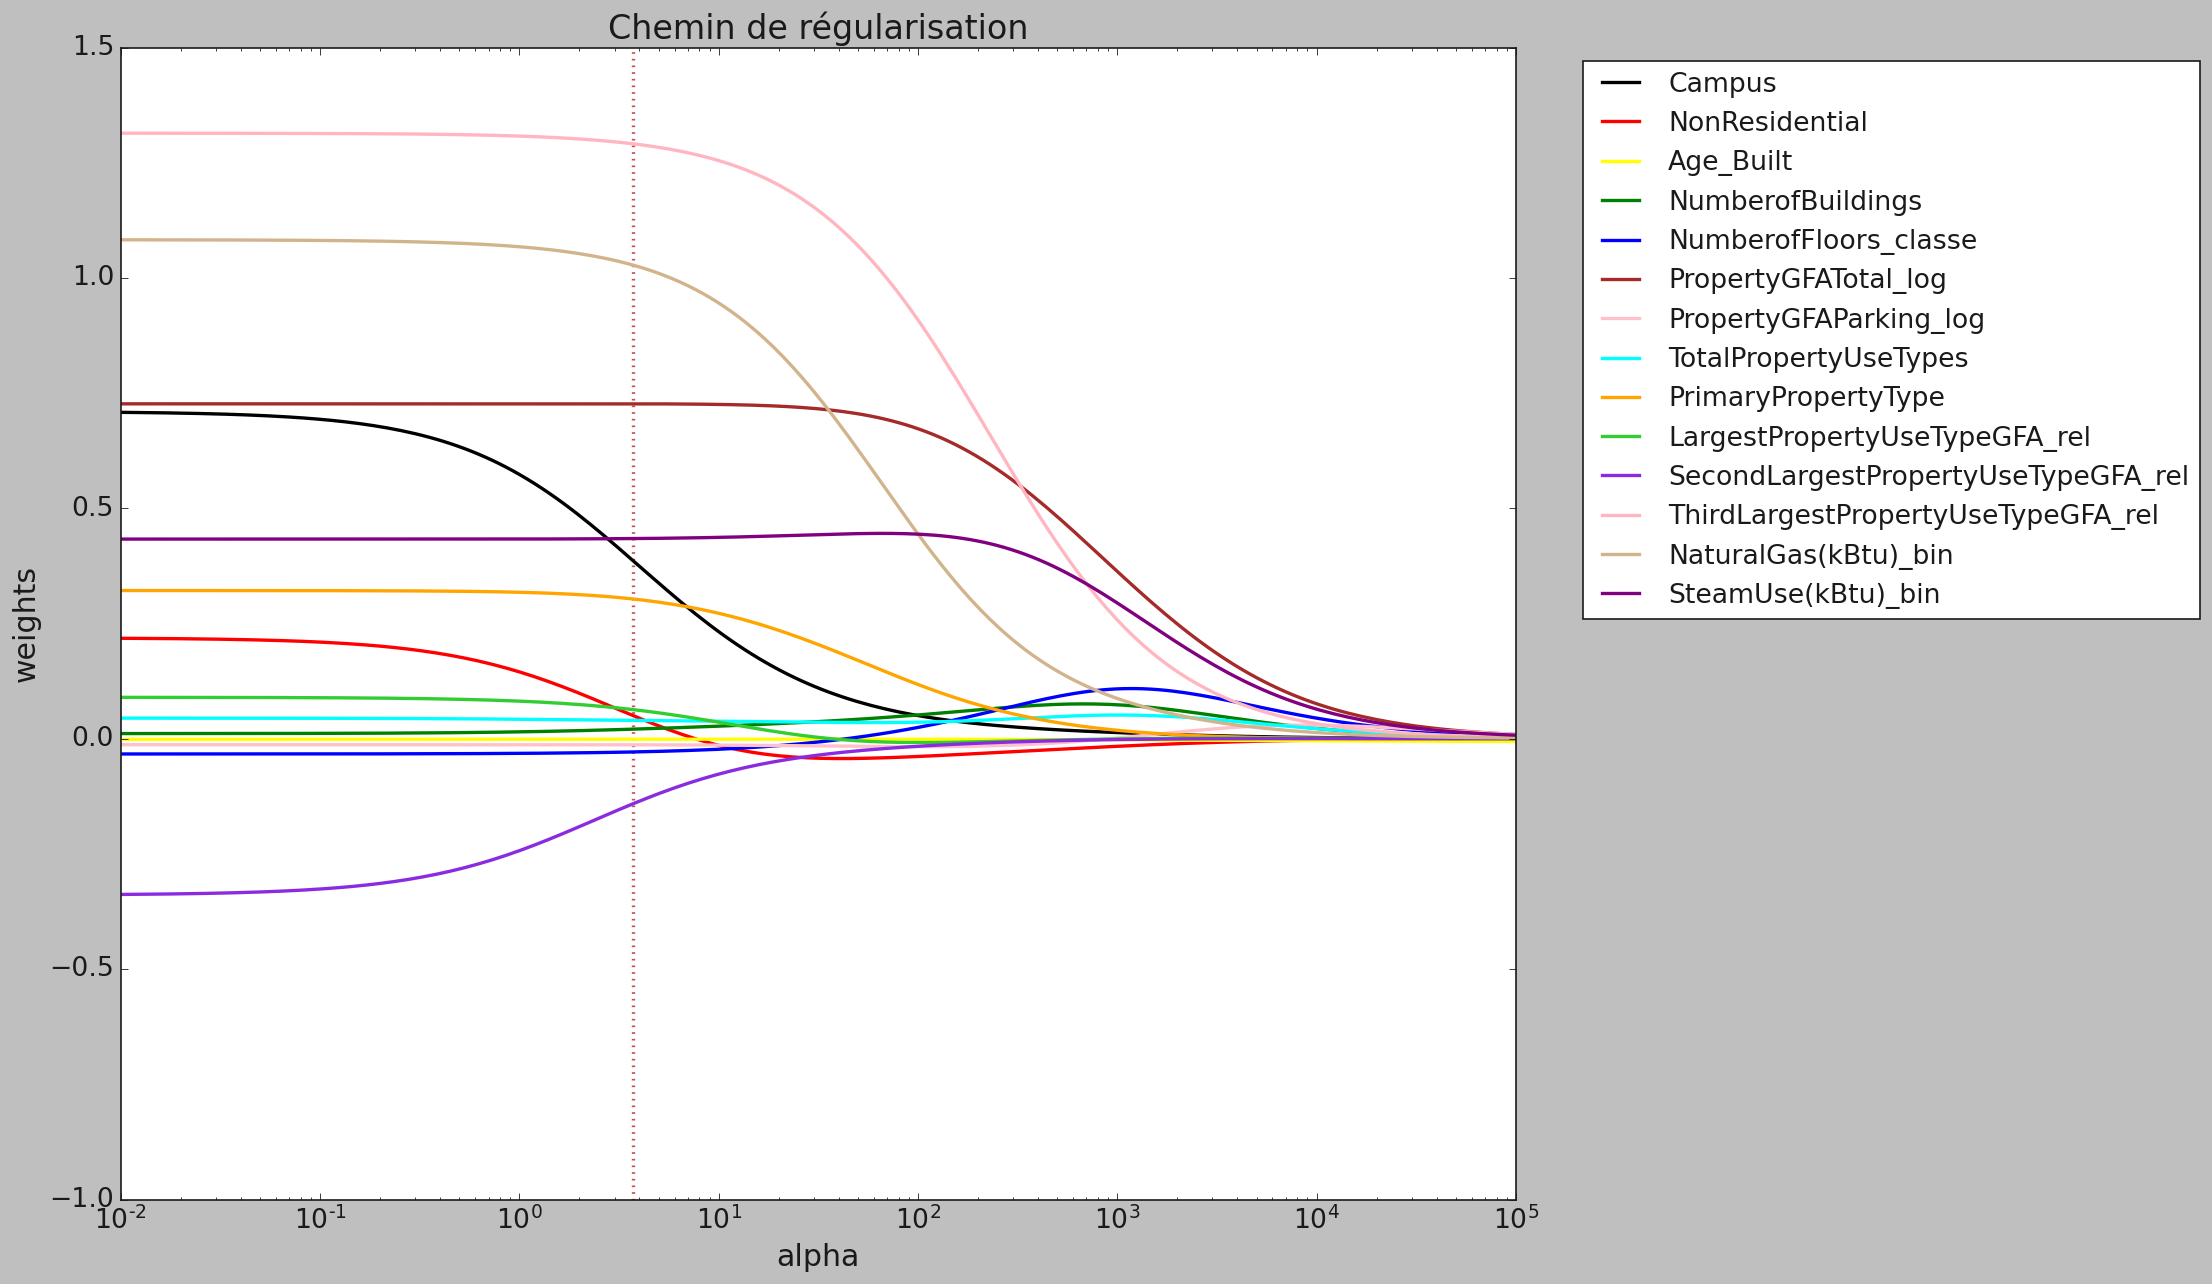

In [38]:
import matplotlib.style as style
from cycler import cycler
coefs = []
# # boucle avec crossvalidation pour chaque alpha
for a in alphas:
    ridge_cv = RidgeCV(alphas=[a],cv=5)
    # entrainement du modèle
    ridge_cv.fit(X_train, y_train)
    coefs.append(ridge_cv.coef_)
    
coefs = np.array(coefs)
coefs=np.resize(coefs,(200,14))

plt.style.use('classic')

fig, ax = plt.subplots(figsize=[15,12],dpi=120)

cy = cycler('color', ['black', 'red','yellow','green','blue','brown','pink','cyan','orange','limegreen','blueviolet','lightpink','tan','purple'])
ax.set_prop_cycle(cy)

ax.plot(alphas,coefs,linewidth=2)
plt.xscale("log")
plt.title('Chemin de régularisation',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('alpha',fontsize=18)
plt.ylabel('weights',fontsize=18)
plt.legend(X.keys(),loc="upper right", bbox_to_anchor=(1.5,1),fontsize=16)

ymin=-1
ymax=1.5
plt.ylim(ymin,ymax)
plt.xlim(1e-2,1e5)
plt.vlines(alpha,ymin=ymin,ymax=ymax,color='r',linestyle=":",linewidth=2)
plt

### Regression Lasso

In [39]:
from sklearn.linear_model import LassoCV

coefs = []
errors = []

n_alphas = 200
alphas = np.logspace(-5,5, n_alphas)
lasso_cv = LassoCV(n_alphas=n_alphas,alphas=alphas, n_jobs=5)

# on entraine le modèle avec le meilleur alpha
start_time = timeit.default_timer()
lasso_cv.fit(X_train, y_train)
elapsed_fit = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_train=lasso_cv.predict(X_train)
elapsed_train = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_test=lasso_cv.predict(X_test)
elapsed_test = timeit.default_timer() - start_time

Best_coeff=lasso_cv.alpha_

# meilleur hyperparamètre alpha
print("Meilleur coefficient de régularisation: {:.5f}".format(Best_coeff))

Meilleur coefficient de régularisation: 0.00517


#### MSE en fonction de alpha

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

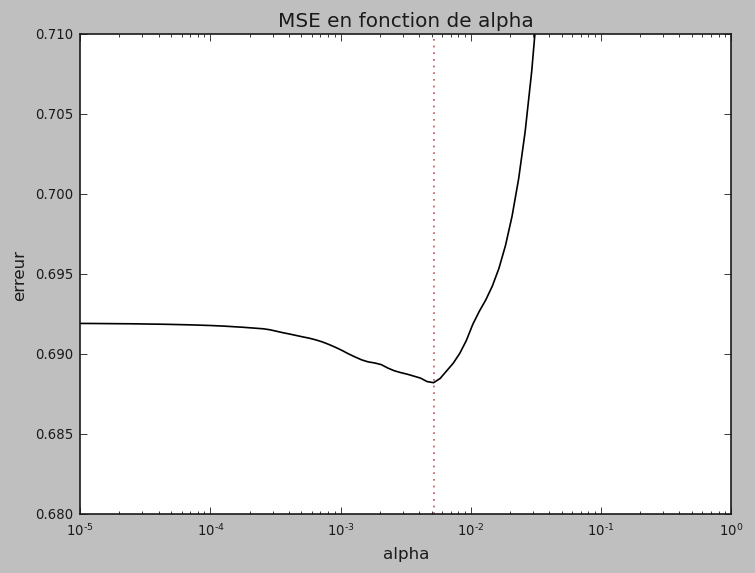

In [40]:
fig=plt.figure(figsize=[7,5],dpi=120)
plt.plot(lasso_cv.alphas_,lasso_cv.mse_path_.mean(1),color='black',linewidth=1)
ymin=0.68
ymax=0.71
plt.xscale("log")
plt.title('MSE en fonction de alpha',fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('alpha',fontsize=10)
plt.ylabel('erreur',fontsize=10)
plt.xlim(1e-5, 1)
plt.ylim(ymin,ymax )
plt.vlines(lasso_cv.alpha_,ymin=ymin,ymax=ymax,color='r',linestyle=":",linewidth=1)
plt

In [41]:
#scores du modèle
print("R2 Score sur jeu de train: {:.3f}".format(lasso_cv.score(X_train, y_train)))
print("R2 Score sur jeu de test: {:.3f}".format(lasso_cv.score(X_test, y_test)))
print("MAE Score sur jeu de train: {:.3f}".format(MAE(predictions_train,y_train)))
print("MAE Score sur jeu de test: {:.3f}".format(MAE(predictions_test,y_test)))
print("Temps entrainement: {:.5f}s".format(elapsed_fit))
print("Temps prediction jeu de train: {:.5f}s".format(elapsed_train))
print("Temps prediction jeu de test: {:.5f}s".format(elapsed_pred))

models_scores['Régression Lasso']=[MAE(predictions_train,y_train),MAE(predictions_test,y_test),elapsed_fit,elapsed_test]

R2 Score sur jeu de train: 0.678
R2 Score sur jeu de test: 0.674
MAE Score sur jeu de train: 0.650
MAE Score sur jeu de test: 0.644
Temps entrainement: 0.09466s
Temps prediction jeu de train: 0.00117s
Temps prediction jeu de test: 0.00146s


#### Chemin de régularisation des coefficients

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

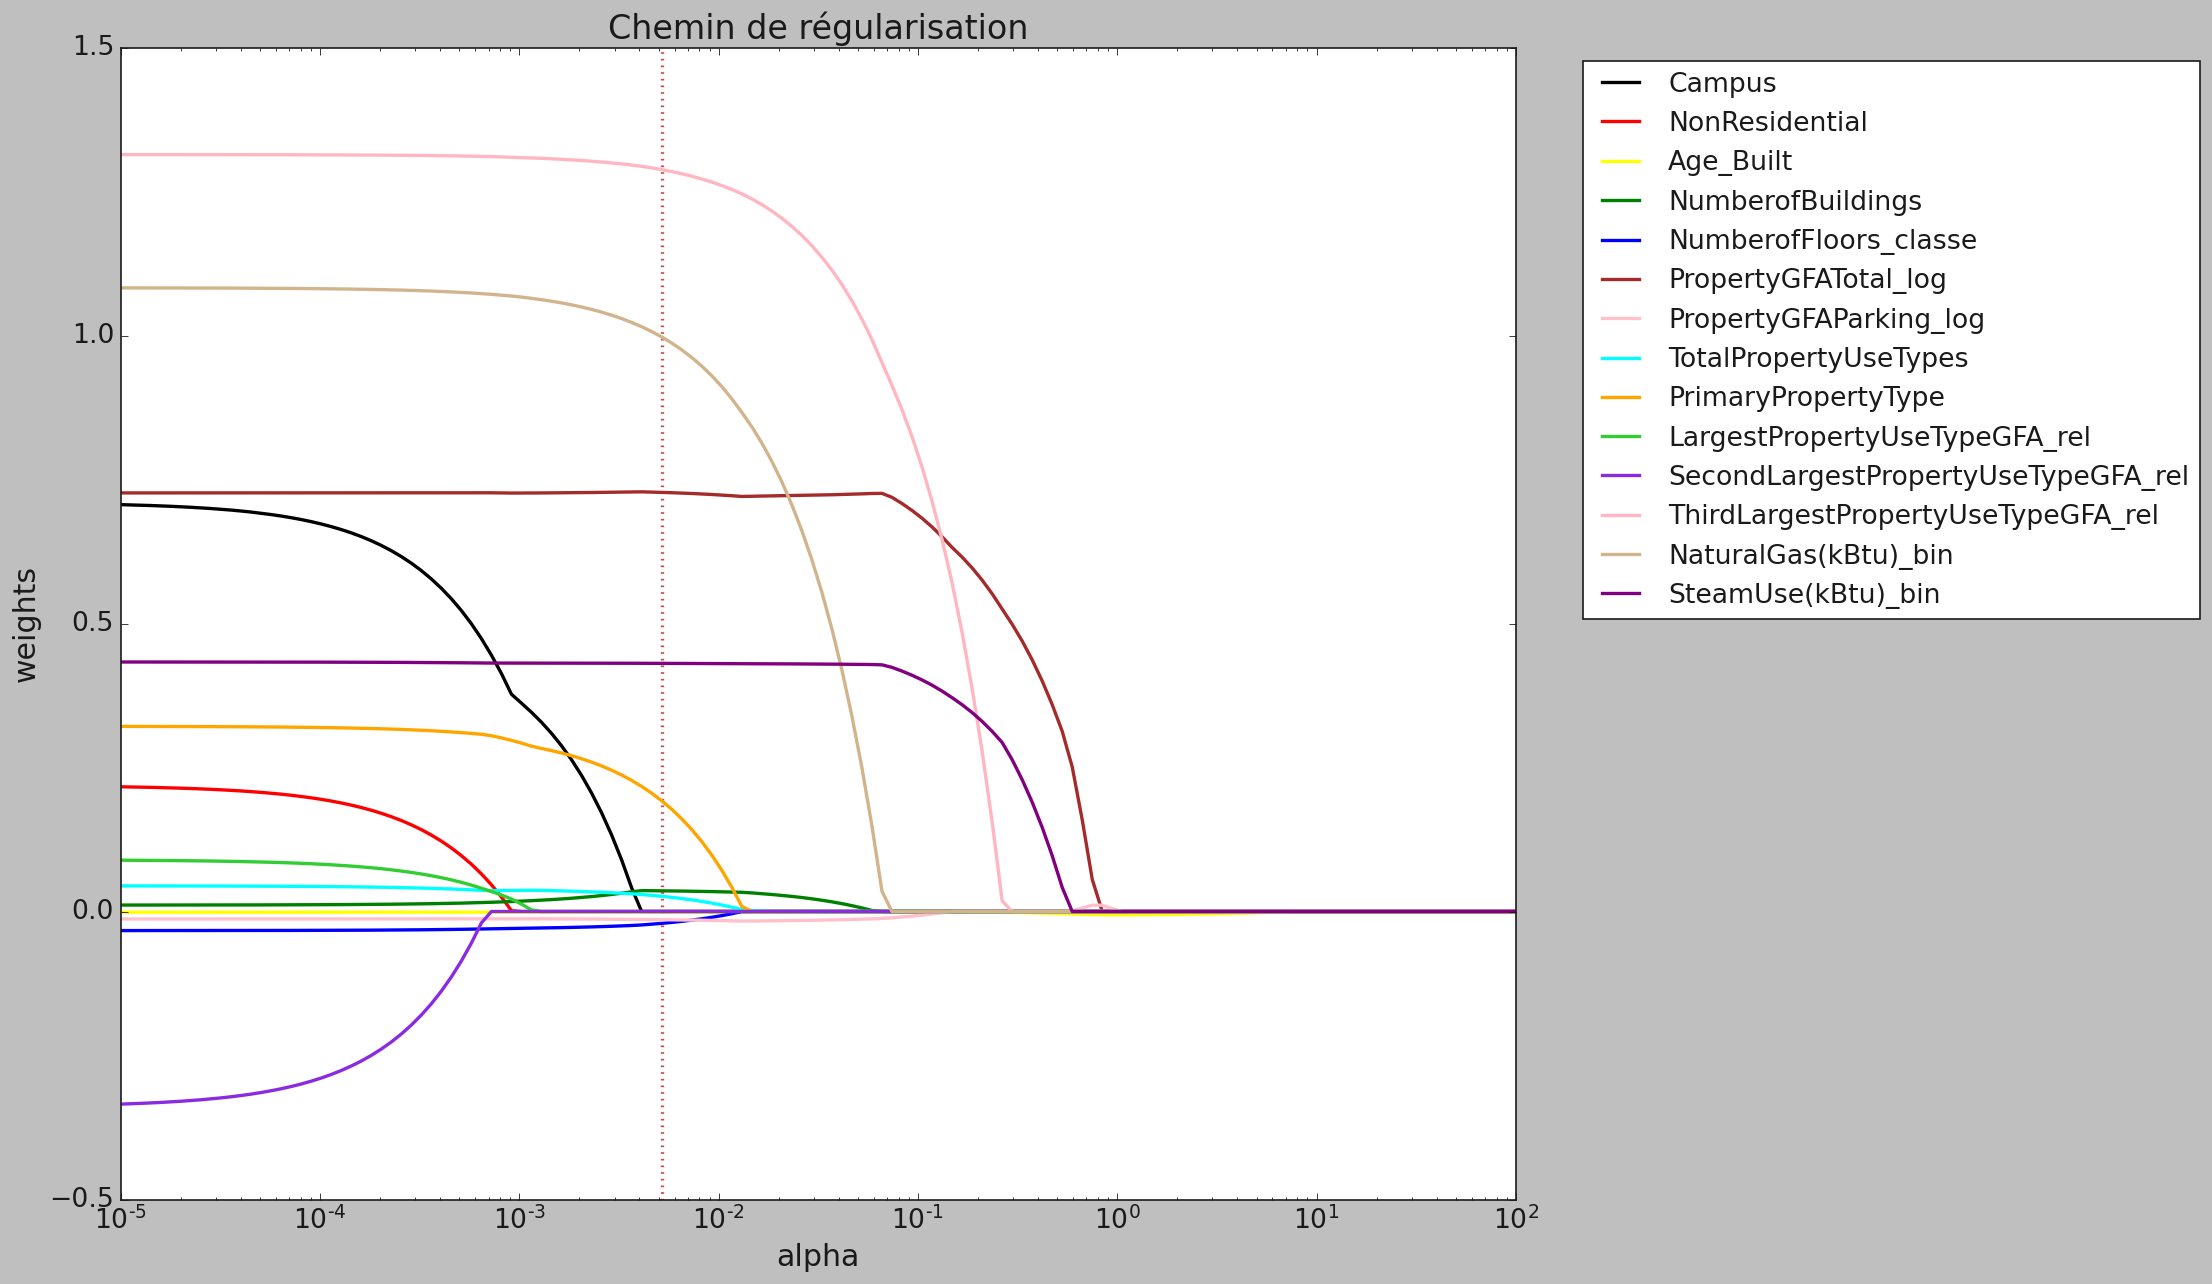

In [42]:
coefs = []
# boucle avec crossvalidation pour chaque alpha
for a in alphas:
    lasso_cv = LassoCV(alphas=[a],cv=5)
    # entrainement du modèle
    lasso_cv.fit(X_train, y_train)
    coefs.append(lasso_cv.coef_)

coefs = np.array(coefs)
coefs=np.resize(coefs,(n_alphas,14))

plt.style.use('classic')

fig, ax = plt.subplots(figsize=[15,12],dpi=120)

cy = cycler('color', ['black', 'red','yellow','green','blue','brown','pink','cyan','orange','limegreen','blueviolet','lightpink','tan','purple'])
ax.set_prop_cycle(cy)

ax.plot(alphas,coefs,linewidth=2)
plt.xscale("log")
plt.title('Chemin de régularisation',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('alpha',fontsize=18)
plt.ylabel('weights',fontsize=18)
plt.legend(X.keys(),loc="upper right", bbox_to_anchor=(1.5,1),fontsize=16)

ymin=-0.5
ymax=1.5
plt.ylim(ymin,ymax)
plt.xlim(1e-5,1e2)
plt.vlines(Best_coeff,ymin=ymin,ymax=ymax,color='r',linestyle=":",linewidth=2)
plt

### ElasticNet

In [43]:
from sklearn.linear_model import ElasticNetCV

coefs = []
errors = []

l1_ratio=[0.01,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9995,1]
n_alphas = 400
alphas = np.logspace(-5,2, n_alphas)

elastic_net_cv = ElasticNetCV(l1_ratio=l1_ratio,tol=0.01, alphas=alphas, eps=0.001)

start_time = timeit.default_timer()
elastic_net_cv.fit(X_train,y_train)
elapsed_fit = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_train=elastic_net_cv.predict(X_train)
elapsed_train = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_test=elastic_net_cv.predict(X_test)
elapsed_test = timeit.default_timer() - start_time

Best_coeff=elastic_net_cv.alpha_

# meilleur hyperparamètre alpha
print("Meilleur coefficient de régularisation: {:.5f}".format(Best_coeff))

L1_ratio_coeff=elastic_net_cv.l1_ratio_

# meilleur hyperparamètreL1_ratio
print("Meilleur ratio L1/L2:",L1_ratio_coeff)

Meilleur coefficient de régularisation: 0.00503
Meilleur ratio L1/L2: 0.9995


#### MSE en fonction de alpha

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

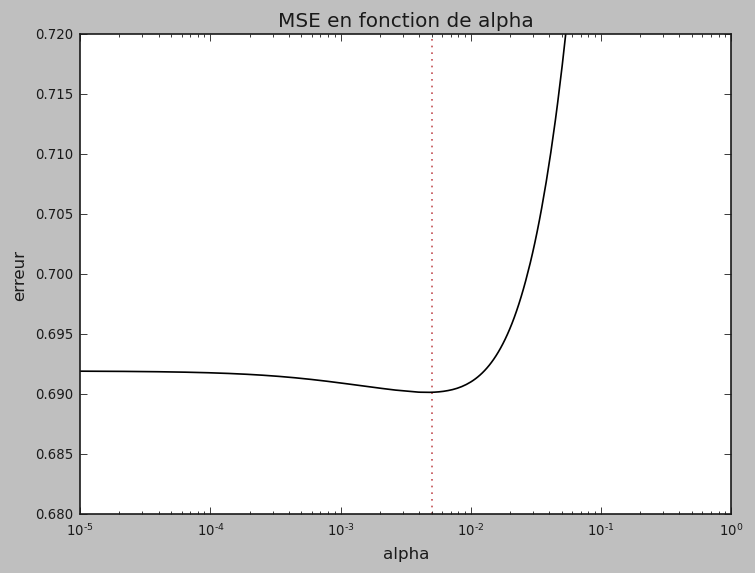

In [44]:
l1_ratio=np.array(l1_ratio)
L1_L2_idx=np.where(l1_ratio==L1_ratio_coeff)
elastic_net_cv.mse_path_=np.resize(elastic_net_cv.mse_path_,(n_alphas,5))
print()

fig=plt.figure(figsize=[7,5],dpi=120)
plt.plot(elastic_net_cv.alphas_,elastic_net_cv.mse_path_.mean(1),color='black',linewidth=1)
ymin=0.68
ymax=0.72
plt.xscale("log")
plt.title('MSE en fonction de alpha',fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('alpha',fontsize=10)
plt.ylabel('erreur',fontsize=10)
plt.xlim(1e-5, 1)
plt.ylim(ymin,ymax )
plt.vlines(Best_coeff,ymin=ymin,ymax=ymax,color='r',linestyle=":",linewidth=1)
plt

In [45]:
#score du modèle
print("R2 Score sur jeu de train: {:.3f}".format(elastic_net_cv.score(X_train, y_train)))
print("R2 Score sur jeu de test: {:.3f}".format(elastic_net_cv.score(X_test, y_test)))
print("MAE Score sur jeu de train: {:.3f}".format(MAE(predictions_train,y_train)))
print("MAE Score sur jeu de test: {:.3f}".format(MAE(predictions_test,y_test)))
print("Temps entrainement: {:.5f}s".format(elapsed_fit))
print("Temps prediction jeu de train: {:.5f}s".format(elapsed_train))
print("Temps prediction jeu de test: {:.5f}s".format(elapsed_pred))

models_scores['Régression ElasticNet']=[MAE(predictions_train,y_train),MAE(predictions_test,y_test),elapsed_fit,elapsed_test]

R2 Score sur jeu de train: 0.678
R2 Score sur jeu de test: 0.674
MAE Score sur jeu de train: 0.650
MAE Score sur jeu de test: 0.644
Temps entrainement: 1.12720s
Temps prediction jeu de train: 0.00093s
Temps prediction jeu de test: 0.00146s


#### Chemin de régularisation des coefficients

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

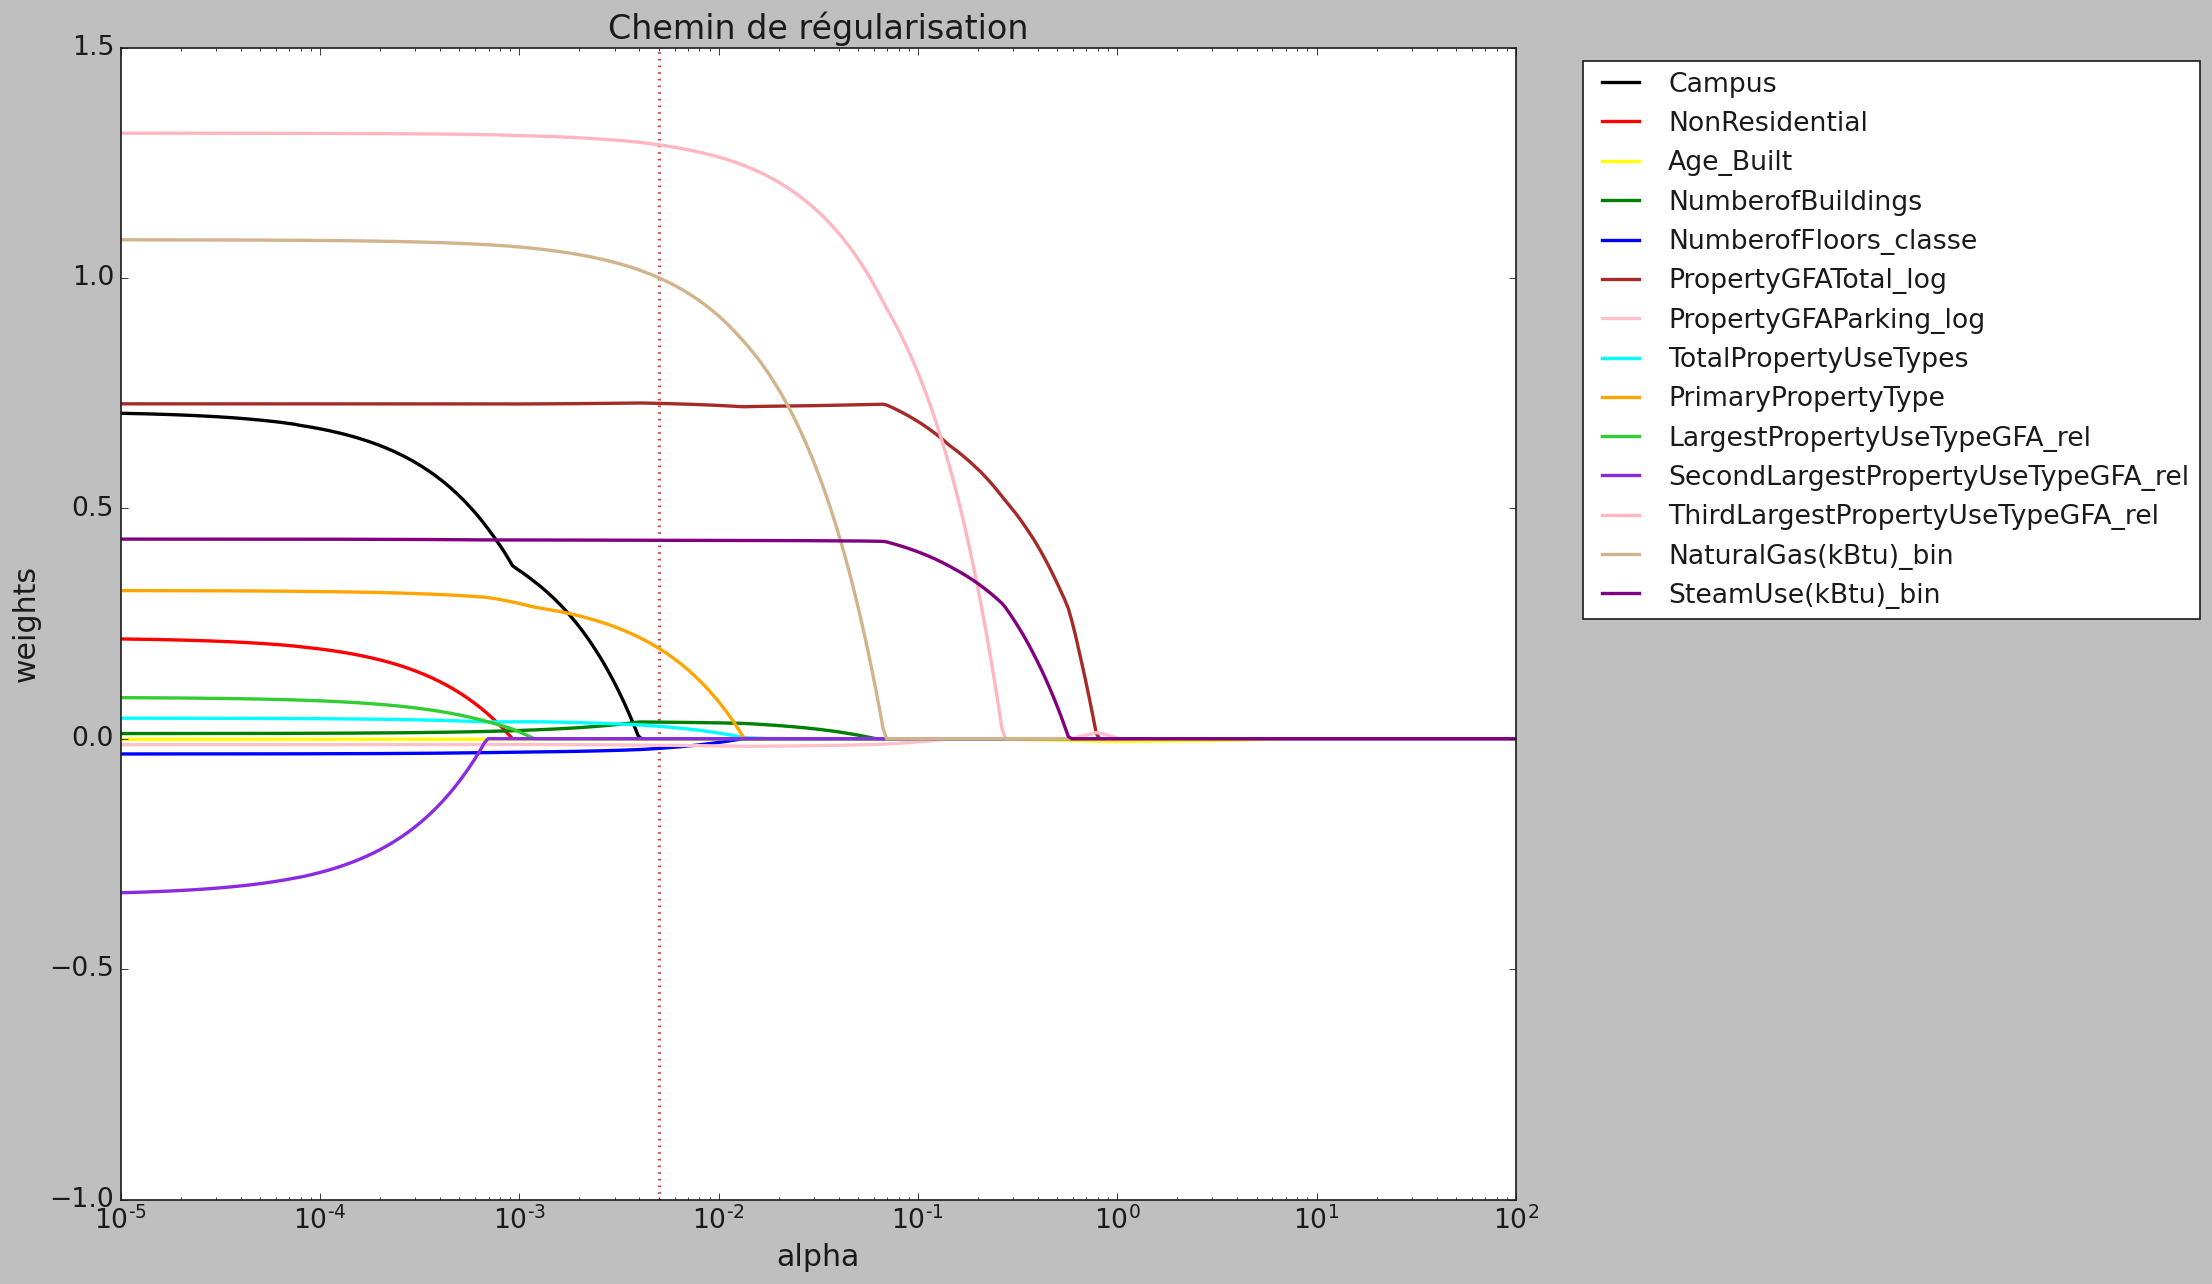

In [46]:
coefs = []
# boucle avec crossvalidation pour chaque alpha
for a in alphas:
    elastic_net_cv = ElasticNetCV(l1_ratio=L1_ratio_coeff,tol=0.01, alphas=[a], eps=0.001)
    # entrainement du modèle
    elastic_net_cv.fit(X_train, y_train)
    coefs.append(elastic_net_cv.coef_)

coefs = np.array(coefs)
coefs=np.resize(coefs,(400,14))

fig, ax = plt.subplots(figsize=[15,12],dpi=120)

cy = cycler('color', ['black', 'red','yellow','green','blue','brown','pink','cyan','orange','limegreen','blueviolet','lightpink','tan','purple'])
ax.set_prop_cycle(cy)
plt.style.use('classic')

ax.plot(alphas,coefs,linewidth=2)
plt.xscale("log")
plt.title('Chemin de régularisation',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('alpha',fontsize=18)
plt.ylabel('weights',fontsize=18)
plt.legend(X.keys(),loc="upper right", bbox_to_anchor=(1.5,1),fontsize=16)

ymin=-1
ymax=1.5
plt.ylim(ymin,ymax)
plt.xlim(1e-5,1e2)
plt.vlines(Best_coeff,ymin=ymin,ymax=ymax,color='r',linestyle=":",linewidth=2)
plt

# Modèles non-lineaires

## Random forest

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)

train_df=pd.concat([X_train, y_train], axis=1, join='inner')
test_df=pd.concat([X_test, y_test], axis=1, join='inner')

encoder=TargetEncoder()
encoder.fit(train_df['PrimaryPropertyType'],train_df['TotalGHGEmissions'])
    
train_df['PrimaryPropertyType_encoded']=encoder.transform(train_df['PrimaryPropertyType'])
test_df['PrimaryPropertyType_encoded']=encoder.transform(test_df['PrimaryPropertyType']) 
X_train['PrimaryPropertyType_log']=np.log1p(train_df['PrimaryPropertyType_encoded'])     
X_test['PrimaryPropertyType_log']=np.log1p(test_df['PrimaryPropertyType_encoded'])
       
X_train.drop('PrimaryPropertyType',axis=1,inplace=True)
X_test.drop('PrimaryPropertyType',axis=1,inplace=True)
y_train['TotalGHGEmissions_log']=np.log1p(train_df['TotalGHGEmissions'])
y_test['TotalGHGEmissions_log']=np.log1p(test_df['TotalGHGEmissions'])
y_train.drop('TotalGHGEmissions',axis=1,inplace=True)
y_test.drop('TotalGHGEmissions',axis=1,inplace=True)

y_train=np.ravel(y_train)

X_train.head()

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=500,oob_score=True)

start_time = timeit.default_timer()
search=rfr.fit(X_train,y_train)
elapsed_fit = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_train=search.predict(X_train)
elapsed_train = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_test=search.predict(X_test)
elapsed_test = timeit.default_timer() - start_time

print("MAE Score sur jeu de train: {:.3f}".format(MAE(predictions_train,y_train)))
print("MAE Score sur jeu de test: {:.3f}".format(MAE(predictions_test,y_test)))
print("Temps entrainement: {:.5f}s".format(elapsed_fit))
print("Temps prediction sur jeu de train: {:.5f}s".format(elapsed_train))
print("Temps prediction sur jeu de test: {:.5f}s".format(elapsed_test))

MAE Score sur jeu de train: 0.225
MAE Score sur jeu de test: 0.593
Temps entrainement: 1.59705s
Temps prediction sur jeu de train: 0.08925s
Temps prediction sur jeu de test: 0.04621s


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)

train_df=pd.concat([X_train, y_train], axis=1, join='inner')
test_df=pd.concat([X_test, y_test], axis=1, join='inner')

encoder=TargetEncoder()
encoder.fit(train_df['PrimaryPropertyType'],train_df['TotalGHGEmissions'])
    
train_df['PrimaryPropertyType_encoded']=encoder.transform(train_df['PrimaryPropertyType'])
test_df['PrimaryPropertyType_encoded']=encoder.transform(test_df['PrimaryPropertyType']) 
X_train['PrimaryPropertyType_log']=np.log1p(train_df['PrimaryPropertyType_encoded'])     
X_test['PrimaryPropertyType_log']=np.log1p(test_df['PrimaryPropertyType_encoded'])
       
X_train.drop('PrimaryPropertyType',axis=1,inplace=True)
X_test.drop('PrimaryPropertyType',axis=1,inplace=True)
y_train['TotalGHGEmissions_log']=np.log1p(train_df['TotalGHGEmissions'])
y_test['TotalGHGEmissions_log']=np.log1p(test_df['TotalGHGEmissions'])
y_train.drop('TotalGHGEmissions',axis=1,inplace=True)
y_test.drop('TotalGHGEmissions',axis=1,inplace=True)

y_train=np.ravel(y_train)

X_train.head()

param_grid = {    
    "n_estimators": np.arange(10,100,5),  
    'max_depth': np.arange(1,15,1),            
    'min_samples_split':np.arange(2,10,1),
    'max_samples':np.arange(0.1,1,0.1),
}

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

rfr=RandomForestRegressor()

clf = RandomizedSearchCV(rfr, param_grid, random_state=42)

start_time = timeit.default_timer()
search=clf.fit(X_train,y_train)
elapsed_fit = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_train= search.predict(X_train)
elapsed_train = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_test= search.predict(X_test)
elapsed_test = timeit.default_timer() - start_time

final_model_rf=search.best_estimator_

print(search.best_params_)
print("MAE Score sur jeu de train: {:.3f}".format(MAE(predictions_train,y_train)))
print("MAE Score sur jeu de test: {:.3f}".format(MAE(predictions_test,y_test)))
print("Temps entrainement: {:.5f}s".format(elapsed_fit))
print("Temps prediction sur jeu de train: {:.5f}s".format(elapsed_train))
print("Temps prediction sur jeu de test: {:.5f}s".format(elapsed_test))

models_scores['Random Forest']=[MAE(predictions_train,y_train),MAE(predictions_test,y_test),elapsed_fit,elapsed_test]

{'n_estimators': 90, 'min_samples_split': 4, 'max_samples': 0.7000000000000001, 'max_depth': 9}
MAE Score sur jeu de train: 0.421
MAE Score sur jeu de test: 0.605
Temps entrainement: 3.07133s
Temps prediction sur jeu de train: 0.01049s
Temps prediction sur jeu de test: 0.00591s


2
n_estimators
max_depth
min_samples_split
max_samples


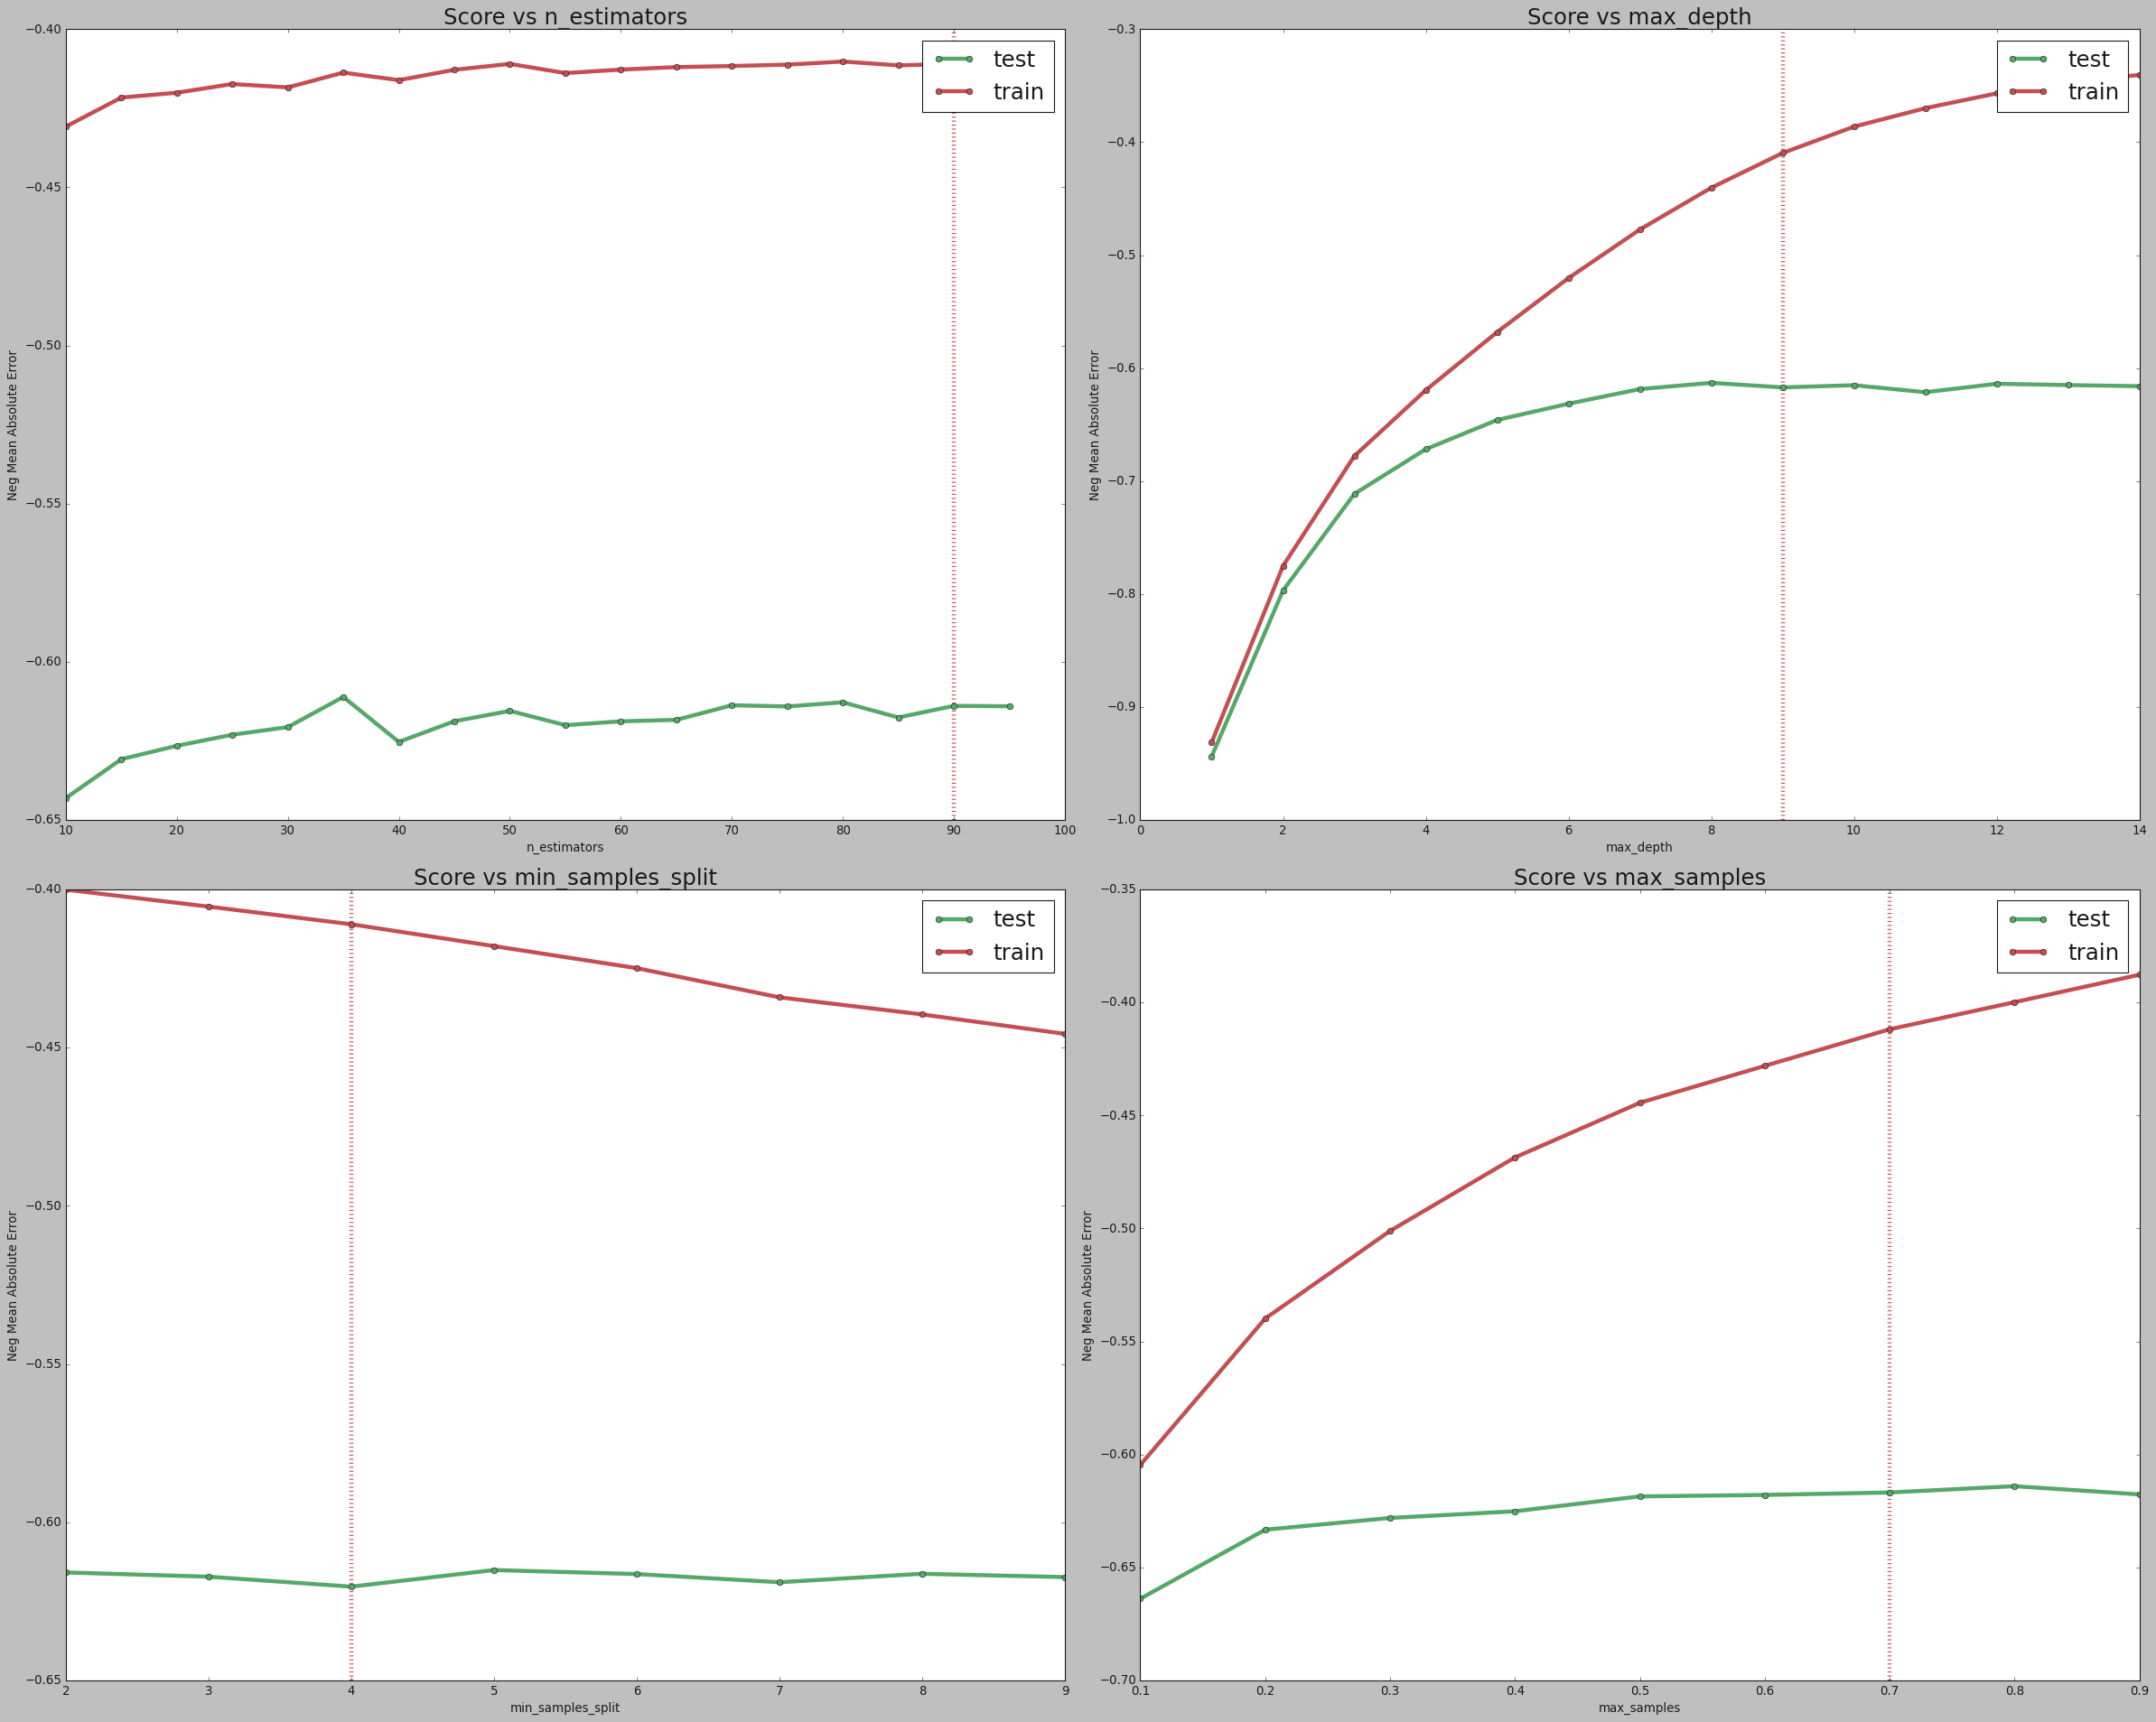

In [49]:
import math
print(math.ceil(len(param_grid)/2))
def plot_search(hyperparam,final_model):
    i=0
    plt.subplots(int(math.ceil(len(param_grid)/2)),2, figsize=(30, 24))
    for par in hyperparam.keys():
        # Grid avec seulement l'hyperparamètre 'par' changé
        i+=1
        print(par)
        dict={par:hyperparam[par]}
        tree_random_search = GridSearchCV(final_model, dict, scoring = 'neg_mean_absolute_error',return_train_score=True)
        tree_random_search.fit(X_train, y_train);
        train_scores = tree_random_search.cv_results_['mean_train_score']
        test_scores = tree_random_search.cv_results_['mean_test_score']
        test_values = list(tree_random_search.cv_results_['param_'+par])
        plt.subplot(math.ceil(len(param_grid)/2)*100+2*10+i)
        plt.plot(test_values, test_scores, 'go-', label = 'test',linewidth=4)
        plt.plot(test_values, train_scores, 'ro-', label = 'train',linewidth=4)
        ymin,ymax=plt.gca().get_ylim()
        plt.vlines(search.best_params_[par],ymin=ymin,ymax=ymax,color='r',linestyle=":",linewidth=4)
        fontsize = 22
        plt.rc('axes', titlesize=fontsize)     
        plt.rc('axes', labelsize=fontsize)    
        plt.rc('xtick', labelsize=fontsize)    
        plt.rc('ytick', labelsize=fontsize)    
        plt.rc('legend', fontsize=fontsize)    
        plt.rc('figure', titlesize=fontsize)  
               
        plt.xlabel(par)
        plt.ylabel('Neg Mean Absolute Error')
        plt.legend()
        plt.title('Score vs %s' % par)
        plt.tight_layout()
    return

plot_search(param_grid,final_model_rf)

## XGBoost 

In [50]:
# Random Search Parameters
from xgboost import XGBRegressor

param_grid = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'n_estimators': np.arange(10,150,5),
    'max_depth': np.arange(3, 10,1),
    'subsample': np.arange(0.4, 1.0, 0.01),
    'min_child_weight': np.arange(1,7,1)
}

from sklearn.ensemble import RandomForestRegressor
xg_random_reg = XGBRegressor(objective= "reg:squarederror")

clf = RandomizedSearchCV(xg_random_reg, param_grid, random_state=42)

start_time = timeit.default_timer()
search=clf.fit(X_train,y_train)
elapsed_fit = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_train= search.predict(X_train)
elapsed_train = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_test= search.predict(X_test)
elapsed_test = timeit.default_timer() - start_time

final_model_xgb=search.best_estimator_

print(search.best_params_)
print("MAE Score sur jeu de train: {:.3f}".format(MAE(predictions_train,y_train)))
print("MAE Score sur jeu de test: {:.3f}".format(MAE(predictions_test,y_test)))
print("Temps entrainement: {:.5f}s".format(elapsed_fit))
print("Temps prediction jeu de train: {:.5f}s".format(elapsed_train))
print("Temps prediction jeu de test: {:.5f}s".format(elapsed_test))

models_scores['XGBoost']=[MAE(predictions_train,y_train),MAE(predictions_test,y_test),elapsed_fit,elapsed_test]

{'subsample': 0.9500000000000005, 'n_estimators': 75, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.09999999999999999}
MAE Score sur jeu de train: 0.351
MAE Score sur jeu de test: 0.576
Temps entrainement: 3.06084s
Temps prediction jeu de train: 0.00257s
Temps prediction jeu de test: 0.00193s


learning_rate
n_estimators
max_depth
subsample
min_child_weight


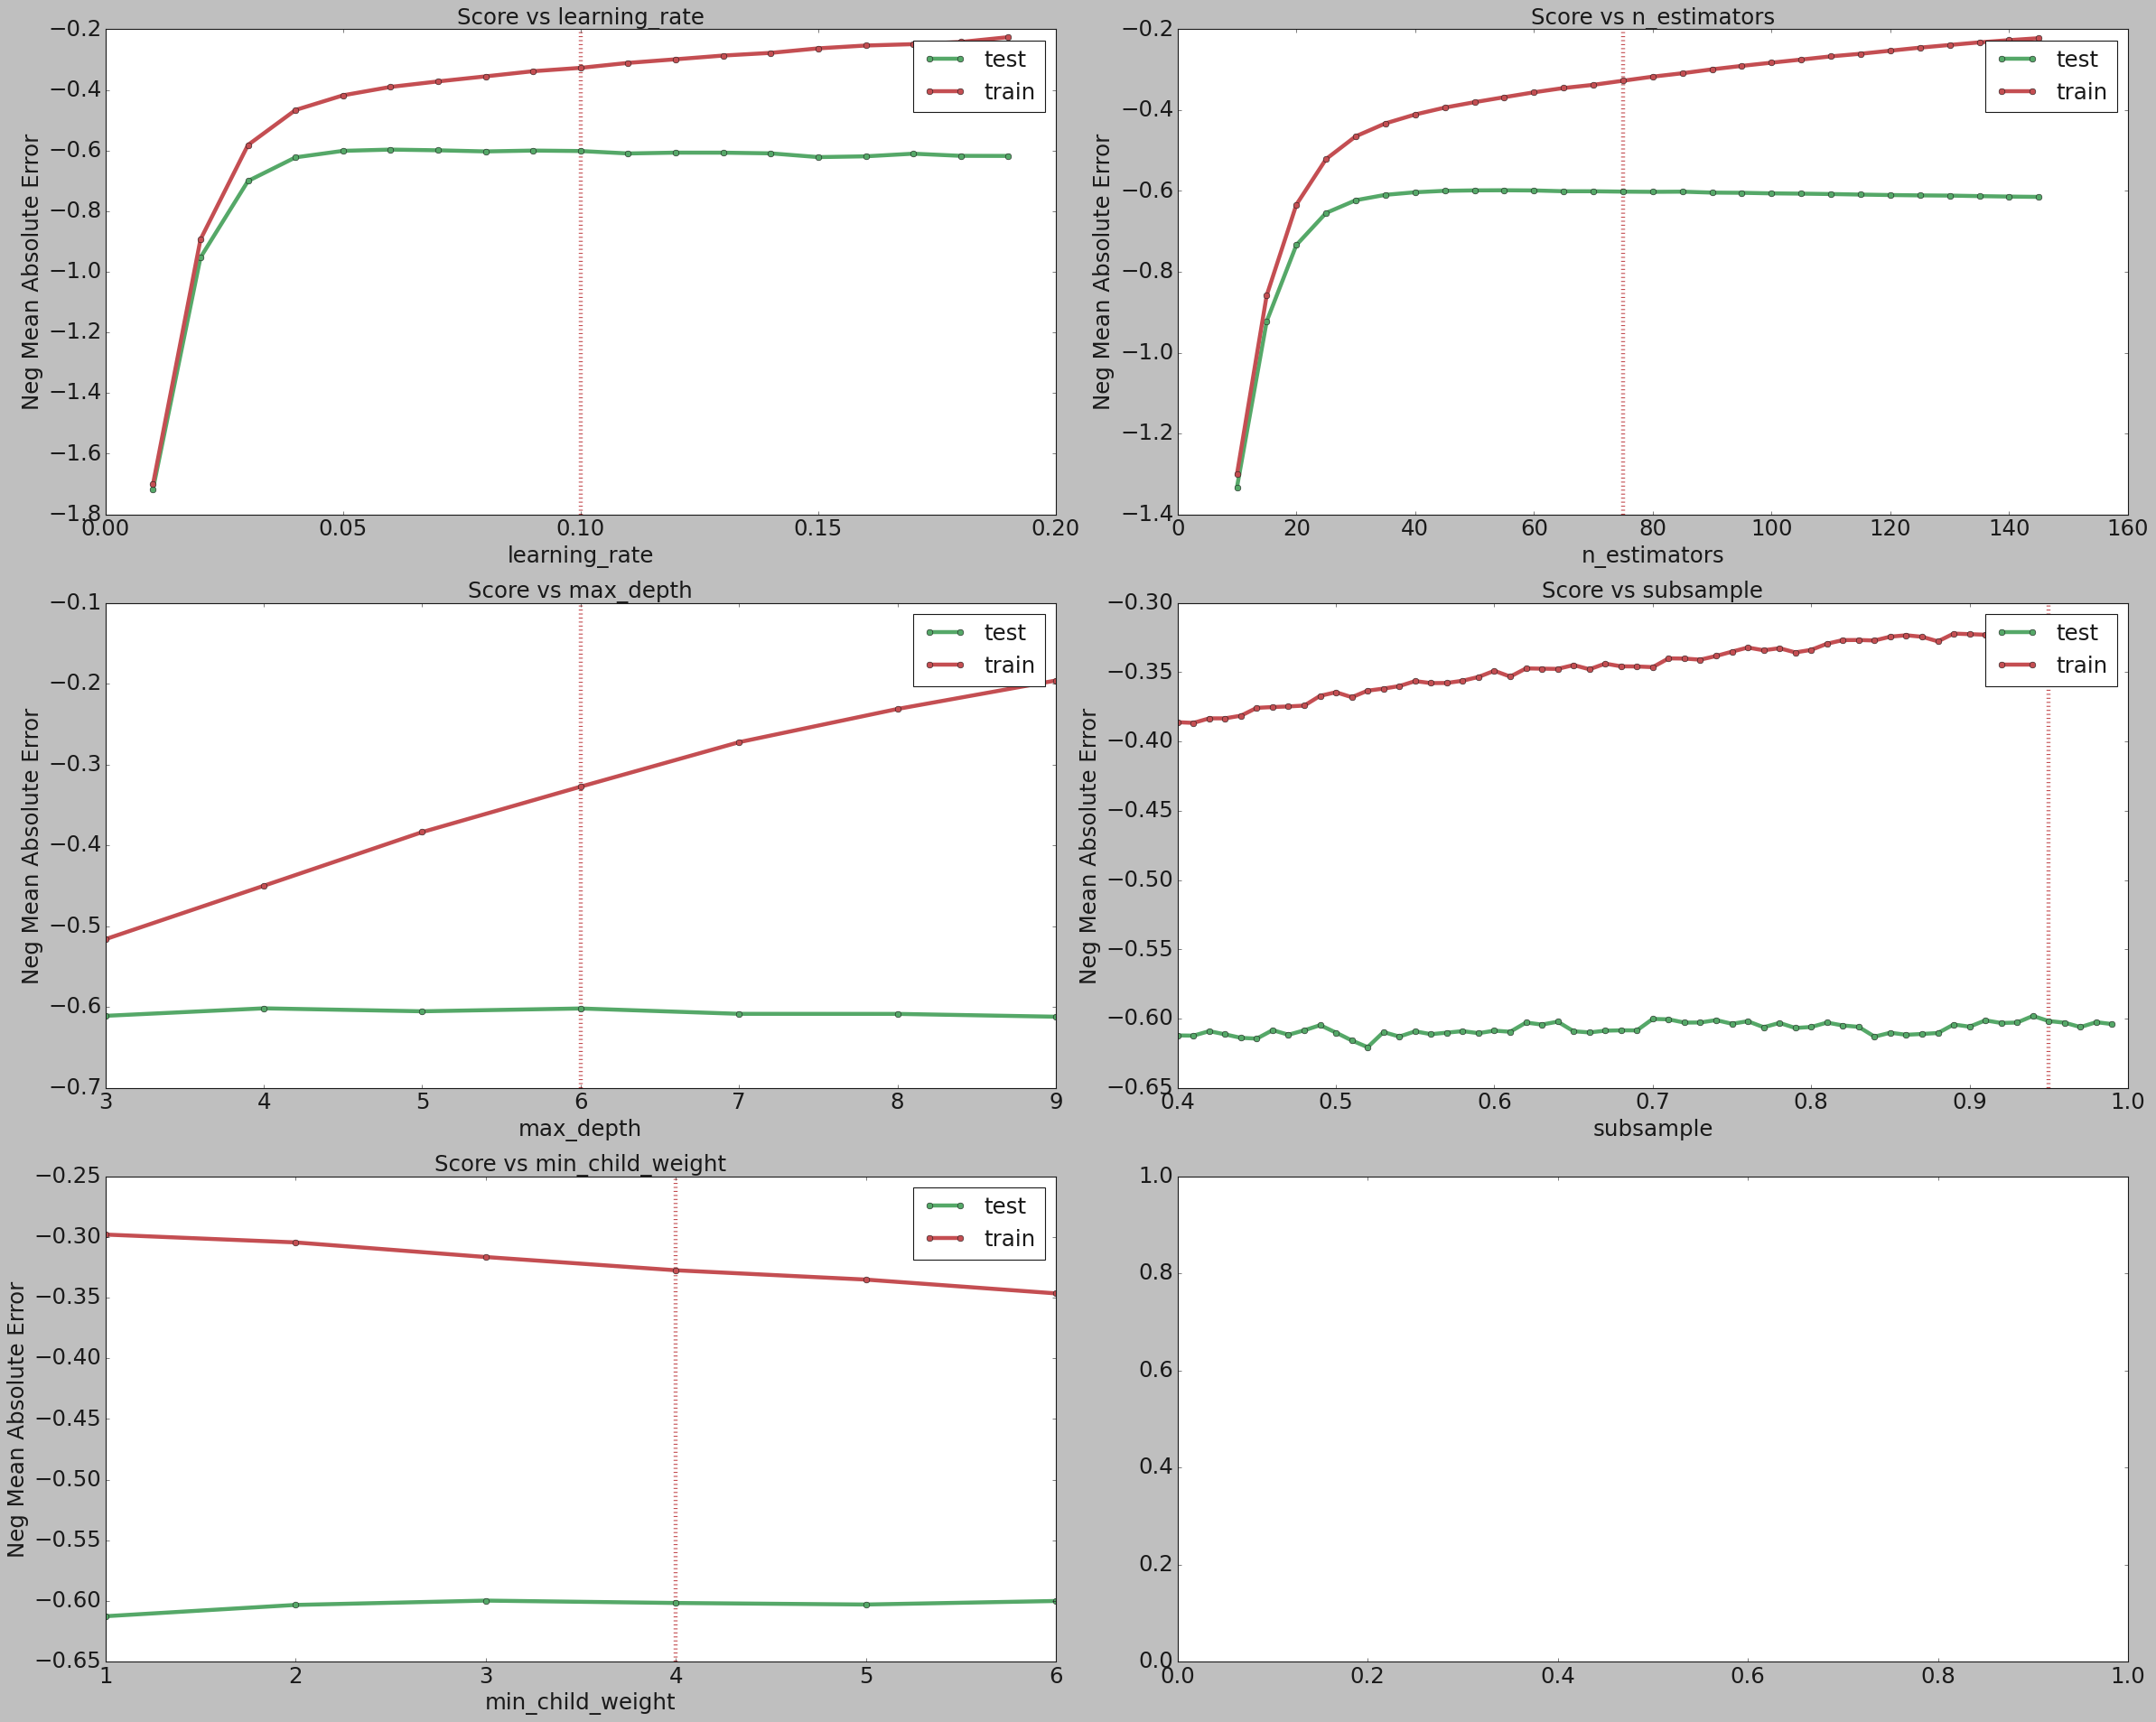

In [51]:
plot_search(param_grid,final_model_xgb)

# Sélection du modèle

MAE_train  MAE_test  Fit_time  Pred_time
Regression lin. multivariée   0.644339  0.652457  0.003923   0.000759
Régression Ridge              0.647862  0.642471  0.013412   0.000817
Régression Lasso              0.649842  0.644468  0.094657   0.000892
Régression ElasticNet         0.649804  0.644431  1.127204   0.000698
Random Forest                 0.420827  0.604915  3.071330   0.005911
XGBoost                       0.350919  0.575764  3.060840   0.001929

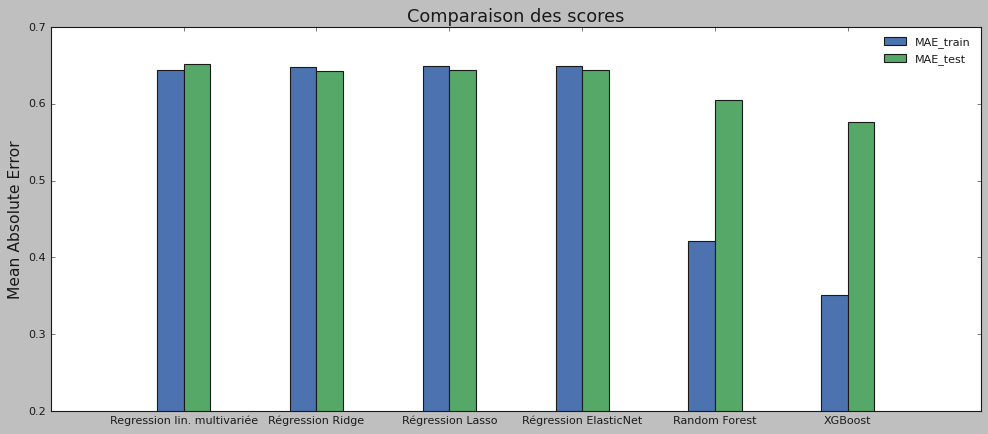

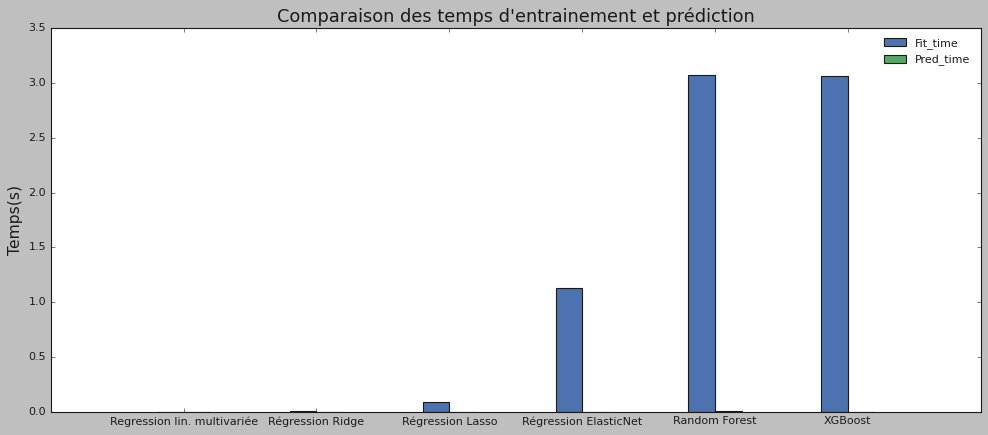

In [52]:
models_scores_df=pd.DataFrame(data=models_scores, index=['MAE_train', 'MAE_test', 'Fit_time', 'Pred_time']).T
display(models_scores_df)
fig=plt.figure(figsize=(15,6))
width=0.2
x = np.arange(len(models_scores_df.values)) 
plt.bar(x - width/2, models_scores_df['MAE_train'].values,width,label='MAE_train')
plt.bar(x + width/2, models_scores_df['MAE_test'].values,width,label='MAE_test')
plt.rcParams.update({'font.size': 6})
plt.xticks(x, models_scores_df.index.values)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.ylabel('Mean Absolute Error',fontsize=14)
plt.title('Comparaison des scores',fontsize=16)
plt.ylim(0.2,0.7)
plt.legend(frameon=False,fontsize=10)
fig=plt.figure(figsize=(15,6))
plt.bar(x - width/2, models_scores_df['Fit_time'].values,width,label='Fit_time')
plt.bar(x + width/2, models_scores_df['Pred_time'].values,width,label='Pred_time')
plt.xticks(x, models_scores_df.index.values)
plt.xticks(fontsize=14, rotation=0)
plt.ylabel('Temps(s)',fontsize=14)
plt.title("Comparaison des temps d'entrainement et prédiction",fontsize=16)
plt.legend(frameon=False,fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

# Importance des variables et interpretabilité du modèle

## Interpretabilité globale et locale

In [53]:
import shap
shap.initjs()

In [54]:
features=X_train.columns
explainer = shap.Explainer(final_model_xgb, X_train, feature_names=features)
shap_values = explainer(X_test)
print(shap_values.values.shape)

(296, 14)


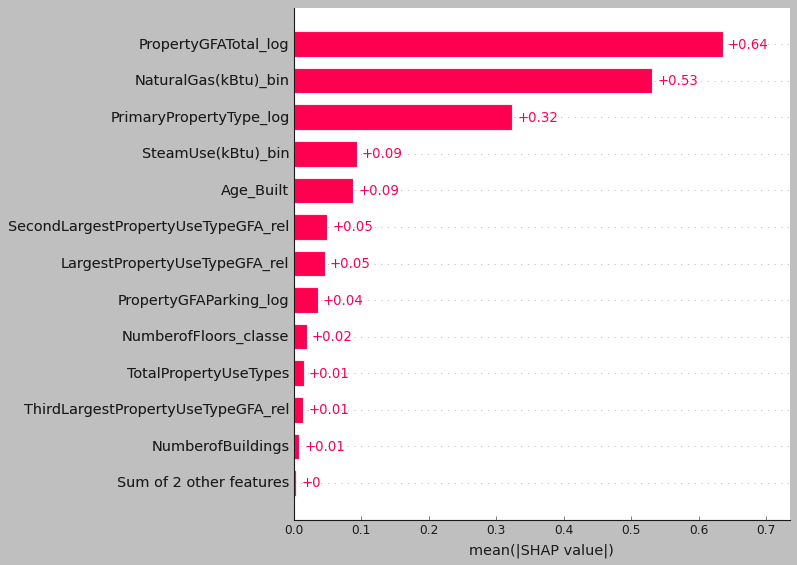

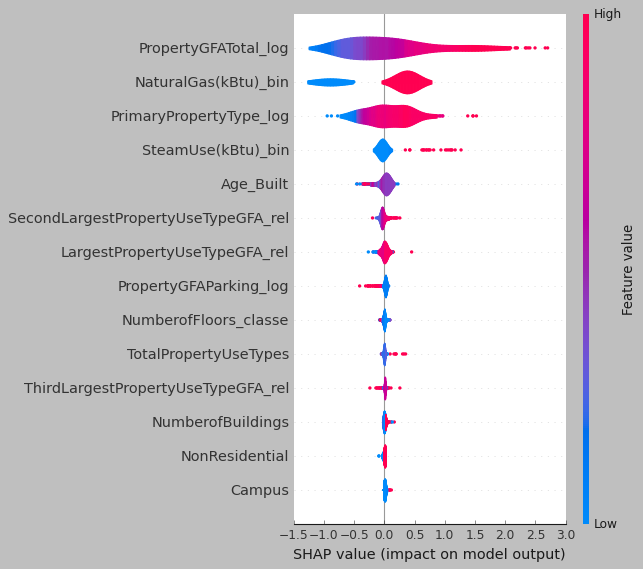

In [55]:
shap.plots.bar(shap_values,max_display=13)
shap.summary_plot(shap_values, plot_type='violin')

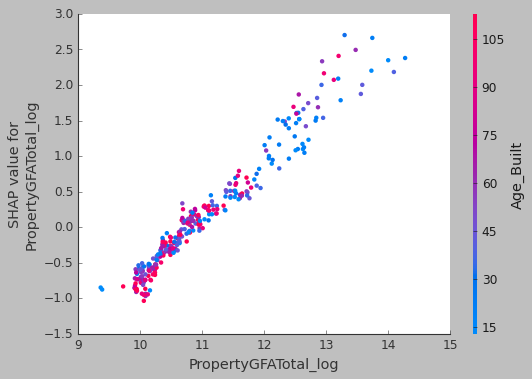

In [56]:
shap.dependence_plot('PropertyGFATotal_log', shap_values.values, X_test,interaction_index="Age_Built")

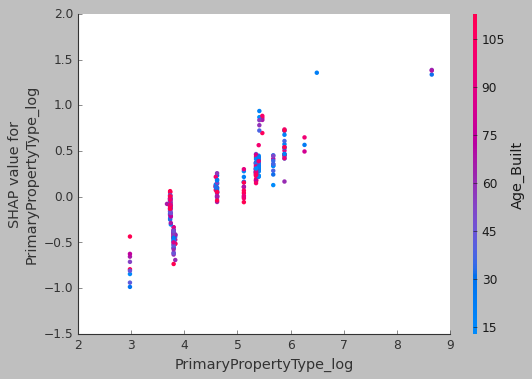

In [77]:
shap.dependence_plot('PrimaryPropertyType_log', shap_values.values, X_test,interaction_index="Age_Built")

In [78]:
df=pd.DataFrame(data.loc[X_test.index[X_test['PrimaryPropertyType_log']>6.4],'PrimaryPropertyType'].values,columns=['PrimaryPropertyType'])
df['PrimaryPropertyType_log']=X_test[X_test['PrimaryPropertyType_log']>6.4]['PrimaryPropertyType_log'].values
df1=pd.DataFrame(df['PrimaryPropertyType'].unique(), columns=['PrimaryPropertyType'])
df1['PrimaryPropertyType_log']=df['PrimaryPropertyType_log'].unique()
df1

PrimaryPropertyType  PrimaryPropertyType_log
0            Hospital                 8.657327
1          Laboratory                 6.494310

In [79]:
df=pd.DataFrame(data.loc[X_test.index[np.logical_and(X_test['PrimaryPropertyType_log']>4,X_test['PrimaryPropertyType_log']<6.4)
],'PrimaryPropertyType'].values,columns=['PrimaryPropertyType'])
df['PrimaryPropertyType_log']=X_test[np.logical_and(X_test['PrimaryPropertyType_log']>4,X_test['PrimaryPropertyType_log']<6.4)
]['PrimaryPropertyType_log'].values
df1=pd.DataFrame(df['PrimaryPropertyType'].unique(), columns=['PrimaryPropertyType'])
df1['PrimaryPropertyType_log']=df['PrimaryPropertyType_log'].unique()
df1

PrimaryPropertyType  PrimaryPropertyType_log
0                        Hotel                 5.885865
1                 Large Office                 5.400958
2           Mixed Use Property                 5.121944
3                 Retail Store                 4.617678
4                  K-12 School                 4.593324
5                        Other                 5.350884
6                   Restaurant                 5.469125
7               Medical Office                 5.674674
8  Supermarket / Grocery Store                 5.412921
9                   University                 6.263107

In [80]:
df=pd.DataFrame(data.loc[X_test.index[X_test['PrimaryPropertyType_log']<4],'PrimaryPropertyType'].values,columns=['PrimaryPropertyType'])
df['PrimaryPropertyType_log']=X_test[X_test['PrimaryPropertyType_log']<4]['PrimaryPropertyType_log'].values
df1=pd.DataFrame(df['PrimaryPropertyType'].unique(), columns=['PrimaryPropertyType'])
df1['PrimaryPropertyType_log']=df['PrimaryPropertyType_log'].unique()
df1

PrimaryPropertyType  PrimaryPropertyType_log
0        Self-Storage Facility                 2.978191
1  Small- and Mid-Sized Office                 3.734171
2                    Warehouse                 3.800415
3          Distribution Center                 3.830823
4             Worship Facility                 3.747460
5       Refrigerated Warehouse                 3.675309

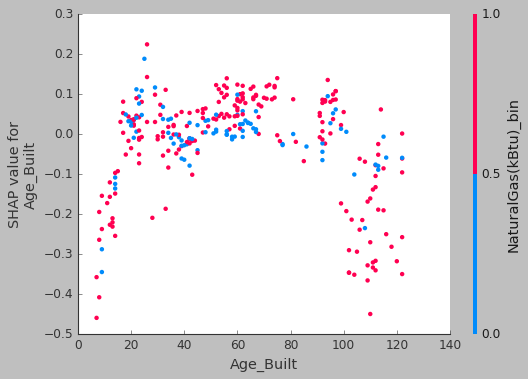

In [61]:
shap.dependence_plot('Age_Built', shap_values.values, X_test,interaction_index="NaturalGas(kBtu)_bin")

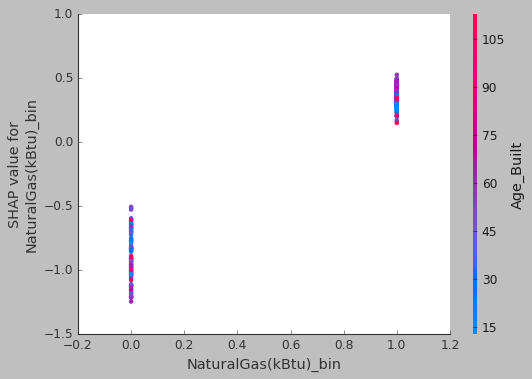

In [62]:
shap.dependence_plot('NaturalGas(kBtu)_bin', shap_values.values, X_test,interaction_index="Age_Built")

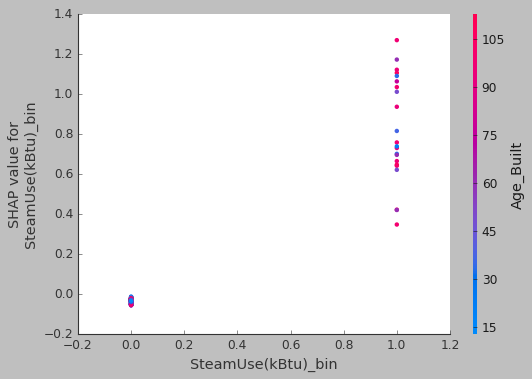

In [63]:
shap.dependence_plot('SteamUse(kBtu)_bin', shap_values.values, X_test,interaction_index="Age_Built")

In [64]:
shap.force_plot(explainer.expected_value, shap_values.values[:,:], X_train.iloc[:,:])

## Séléction des variables: Recursive Feature Elimination (RFE) 

In [65]:
from sklearn.feature_selection import RFE

RFE_mae_scores_train=[]
RFE_mae_scores_test=[]
order_suppr_features=[]
suppr_feature=[]
fit_time=[]
train_time=[]
test_time=[]

#on crée le modèle RFE pour le classifieur XGBBoost et on séléctionne les variables

# Select the best 3 features according to RFE
for i in range(0,len(X_train.columns)):
    rfe = RFE(final_model_xgb, n_features_to_select=len(X_train.columns)-i,step=1)
    start_time = timeit.default_timer()
    rfe.fit(X_train, y_train)
    fit_time = timeit.default_timer() - start_time

    #print("Feature selection", rfe.support_)
    suppr_feature1=suppr_feature
    suppr_feature=np.where(rfe.support_==False)[0]
    order_suppr_features =order_suppr_features+ [value for value in suppr_feature if value not in suppr_feature1]

    #on reduit X_train et X_test aux variables séléctionnées
    start_time = timeit.default_timer()
    predictions_train = rfe.predict(X_train)
    train_time = timeit.default_timer() - start_time
    
    start_time = timeit.default_timer()
    predictions_test = rfe.predict(X_test)
    test_time = timeit.default_timer() - start_time

    RFE_mae_scores_train.append(MAE(predictions_train,y_train))
    RFE_mae_scores_test.append(MAE(predictions_test,y_test))

suppr_order = [X_train.columns.values[i] for i in order_suppr_features]

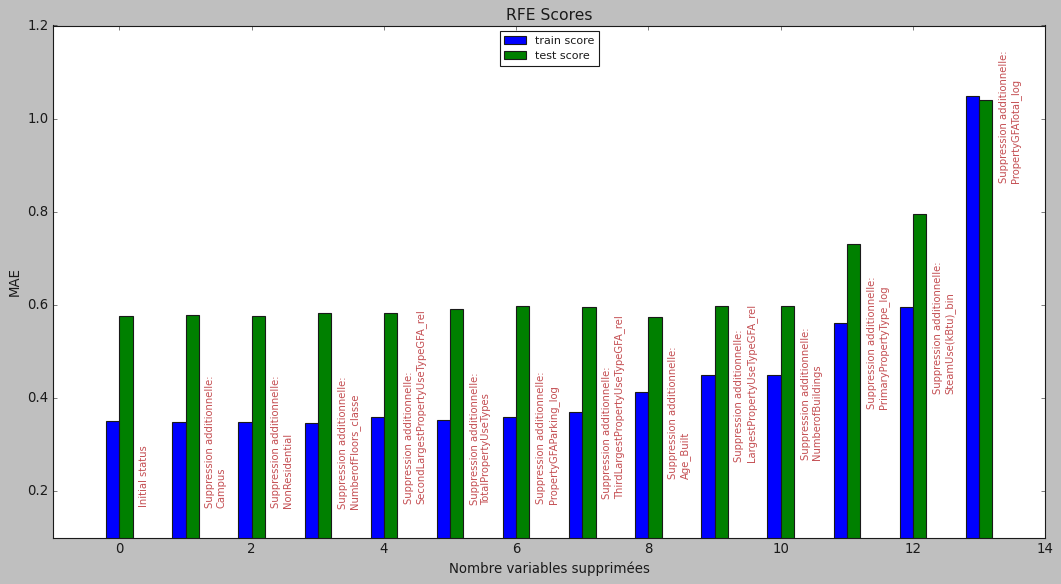

In [66]:
fig=plt.figure(figsize=(16,8))
plt.bar(np.arange(0,len(X_train.columns))- width/2, RFE_mae_scores_train, color ='blue',width = 0.2)
plt.bar(np.arange(0,len(X_test.columns))+ width/2, RFE_mae_scores_test, color ='green',width = 0.2)

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
ax = plt.gca()
ax.set_xlim([-1, len(X_train.columns)])
ax.set_ylim([0.1, None])
plt.title('RFE Scores',fontsize=14)
plt.xlabel('Nombre variables supprimées',fontsize=12)
plt.ylabel('MAE',fontsize=12)
plt.legend(['train score', 'test score'],fontsize=10,loc = "upper center")

text1=[suppr_order]
text=['Initial status'] + ['Suppression additionnelle:\n' + sub for sub in text1[0]]

for x, y, p in zip(np.arange(0,len(X_train.columns)), RFE_mae_scores_train, text):
   plt.text(x+0.3, y-0.18, p, rotation=90,fontsize=9, color='r')

In [67]:
X_train.columns

Index(['Campus', 'NonResidential', 'Age_Built', 'NumberofBuildings',
       'NumberofFloors_classe', 'PropertyGFATotal_log',
       'PropertyGFAParking_log', 'TotalPropertyUseTypes',
       'LargestPropertyUseTypeGFA_rel', 'SecondLargestPropertyUseTypeGFA_rel',
       'ThirdLargestPropertyUseTypeGFA_rel', 'NaturalGas(kBtu)_bin',
       'SteamUse(kBtu)_bin', 'PrimaryPropertyType_log'],
      dtype='object')

In [68]:
Var_drop=['NonResidential','NumberofBuildings','PropertyGFAParking_log','NumberofFloors_classe',
          'Campus','ThirdLargestPropertyUseTypeGFA_rel','SecondLargestPropertyUseTypeGFA_rel']
X_train_red=X_train.drop(Var_drop,axis=1)
X_test_red=X_test.drop(Var_drop,axis=1)

# Random Search Parameters
from xgboost import XGBRegressor

param_grid = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'n_estimators': np.arange(10,150,5),
    'max_depth': np.arange(3, 10,1),
    'subsample': np.arange(0.4, 1.0, 0.01),
    'min_child_weight': np.arange(1,7,1)
}

from sklearn.ensemble import RandomForestRegressor
xg_random_reg = XGBRegressor(objective= "reg:squarederror")

clf = RandomizedSearchCV(xg_random_reg, param_grid, random_state=42)

start_time = timeit.default_timer()
search=clf.fit(X_train_red,y_train)
elapsed_fit = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_train= search.predict(X_train_red)
elapsed_train = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_test= search.predict(X_test_red)
elapsed_test = timeit.default_timer() - start_time

final_model=search.best_estimator_

print(search.best_params_)
print("MAE Score sur jeu de train: {:.3f}".format(MAE(predictions_train,y_train)))
print("MAE Score sur jeu de test: {:.3f}".format(MAE(predictions_test,y_test)))
print("Temps entrainement: {:.5f}s".format(elapsed_fit))
print("Temps prediction jeu de train: {:.5f}s".format(elapsed_train))
print("Temps prediction jeu de test: {:.5f}s".format(elapsed_test))

models_scores['XGBoost_red']=[MAE(predictions_train,y_train),MAE(predictions_test,y_test),elapsed_fit,elapsed_test]


{'subsample': 0.7400000000000003, 'n_estimators': 40, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.17}
MAE Score sur jeu de train: 0.538
MAE Score sur jeu de test: 0.591
Temps entrainement: 3.10212s
Temps prediction jeu de train: 0.00252s
Temps prediction jeu de test: 0.00175s


MAE_train  MAE_test  Fit_time  Pred_time
Regression lin. multivariée   0.644339  0.652457  0.003923   0.000759
Régression Ridge              0.647862  0.642471  0.013412   0.000817
Régression Lasso              0.649842  0.644468  0.094657   0.000892
Régression ElasticNet         0.649804  0.644431  1.127204   0.000698
Random Forest                 0.420827  0.604915  3.071330   0.005911
XGBoost                       0.350919  0.575764  3.060840   0.001929
XGBoost_red                   0.537544  0.591070  3.102123   0.001754

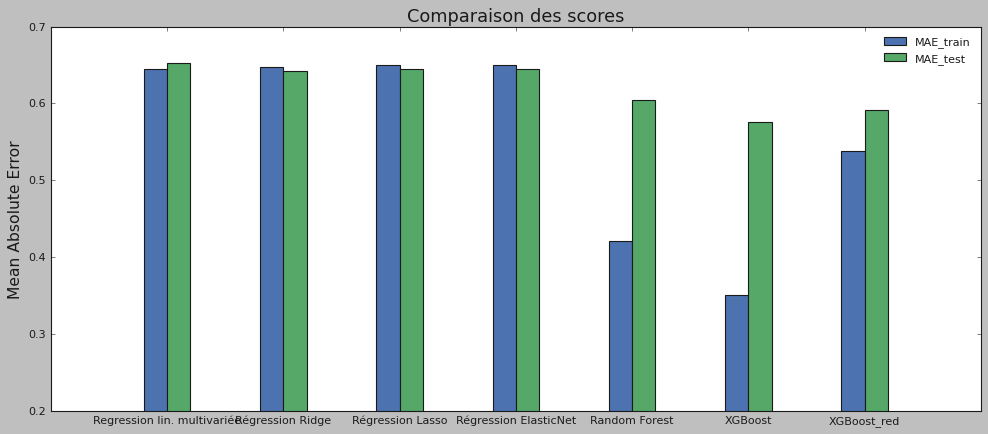

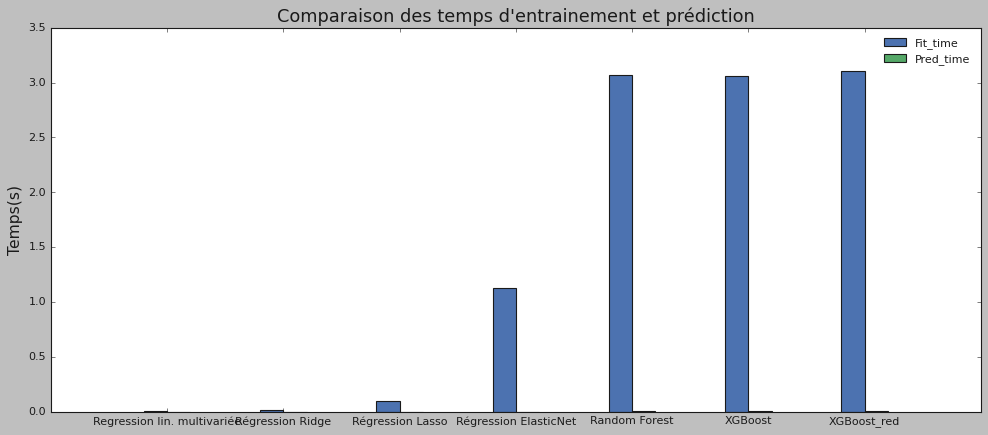

In [69]:
models_scores_df=pd.DataFrame(data=models_scores, index=['MAE_train', 'MAE_test', 'Fit_time', 'Pred_time']).T
display(models_scores_df)
fig=plt.figure(figsize=(15,6))
width=0.2
x = np.arange(len(models_scores_df.values)) 
plt.bar(x - width/2, models_scores_df['MAE_train'].values,width,label='MAE_train')
plt.bar(x + width/2, models_scores_df['MAE_test'].values,width,label='MAE_test')
plt.rcParams.update({'font.size': 6})
plt.xticks(x, models_scores_df.index.values)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.ylabel('Mean Absolute Error',fontsize=14)
plt.title('Comparaison des scores',fontsize=16)
plt.ylim(0.2,0.7)
plt.legend(frameon=False,fontsize=10)
fig=plt.figure(figsize=(15,6))
plt.bar(x - width/2, models_scores_df['Fit_time'].values,width,label='Fit_time')
plt.bar(x + width/2, models_scores_df['Pred_time'].values,width,label='Pred_time')
plt.xticks(x, models_scores_df.index.values)
plt.xticks(fontsize=14, rotation=0)
plt.ylabel('Temps(s)',fontsize=14)
plt.title("Comparaison des temps d'entrainement et prédiction",fontsize=16)
plt.legend(frameon=False,fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

# Influence variable ENERGYSTARScore

In [70]:
X=data.drop(columns=['AgeBuilt_classe','SiteEnergyUse(kBtu)','TotalGHGEmissions','ENERGYSTARScore'],axis=1)
y=pd.DataFrame()
y['TotalGHGEmissions']=data['TotalGHGEmissions']
X.drop(Drop_list,axis=0,inplace=True)
y.drop(Drop_list,axis=0,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)

train_df=pd.concat([X_train, y_train], axis=1, join='inner')
test_df=pd.concat([X_test, y_test], axis=1, join='inner')

encoder=TargetEncoder()
encoder.fit(train_df['PrimaryPropertyType'],train_df['TotalGHGEmissions'])
    
train_df['PrimaryPropertyType_encoded']=encoder.transform(train_df['PrimaryPropertyType'])
test_df['PrimaryPropertyType_encoded']=encoder.transform(test_df['PrimaryPropertyType']) 
X_train['PrimaryPropertyType_log']=np.log1p(train_df['PrimaryPropertyType_encoded'])     
X_test['PrimaryPropertyType_log']=np.log1p(test_df['PrimaryPropertyType_encoded'])
       
X_train.drop('PrimaryPropertyType',axis=1,inplace=True)
X_test.drop('PrimaryPropertyType',axis=1,inplace=True)
y_train['TotalGHGEmissions_log']=np.log1p(train_df['TotalGHGEmissions'])
y_test['TotalGHGEmissions_log']=np.log1p(test_df['TotalGHGEmissions'])
y_train.drop('TotalGHGEmissions',axis=1,inplace=True)
y_test.drop('TotalGHGEmissions',axis=1,inplace=True)

y_train=np.ravel(y_train)

from xgboost import XGBRegressor

param_grid = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'n_estimators': np.arange(10,150,5),
    'max_depth': np.arange(3, 10,1),
    'subsample': np.arange(0.4, 1.0, 0.01),
    'min_child_weight': np.arange(1,7,1)
}

from sklearn.ensemble import RandomForestRegressor
xg_random_reg = XGBRegressor(objective= "reg:squarederror")

clf = RandomizedSearchCV(xg_random_reg, param_grid, random_state=42)

start_time = timeit.default_timer()
search=clf.fit(X_train,y_train)
elapsed_fit = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_train= search.predict(X_train)
elapsed_train = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_test= search.predict(X_test)
elapsed_test = timeit.default_timer() - start_time

final_model_xgb=search.best_estimator_

print(search.best_params_)
print("MAE Score sur jeu de train: {:.3f}".format(MAE(predictions_train,y_train)))
print("MAE Score sur jeu de test: {:.3f}".format(MAE(predictions_test,y_test)))
print("Temps entrainement: {:.5f}s".format(elapsed_fit))
print("Temps prediction jeu de train: {:.5f}s".format(elapsed_train))
print("Temps prediction jeu de test: {:.5f}s".format(elapsed_test))

models_scores['XGBoost_avec_ENERGYSTARScore_imputed']=[MAE(predictions_train,y_train),MAE(predictions_test,y_test),elapsed_fit,elapsed_test]

{'subsample': 0.9500000000000005, 'n_estimators': 75, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.09999999999999999}
MAE Score sur jeu de train: 0.297
MAE Score sur jeu de test: 0.518
Temps entrainement: 3.52173s
Temps prediction jeu de train: 0.00331s
Temps prediction jeu de test: 0.00320s


In [71]:
features=X_train.columns
explainer = shap.Explainer(final_model_xgb, X_train, feature_names=features)
shap_values = explainer(X_test)
print(shap_values.values.shape)

(296, 15)


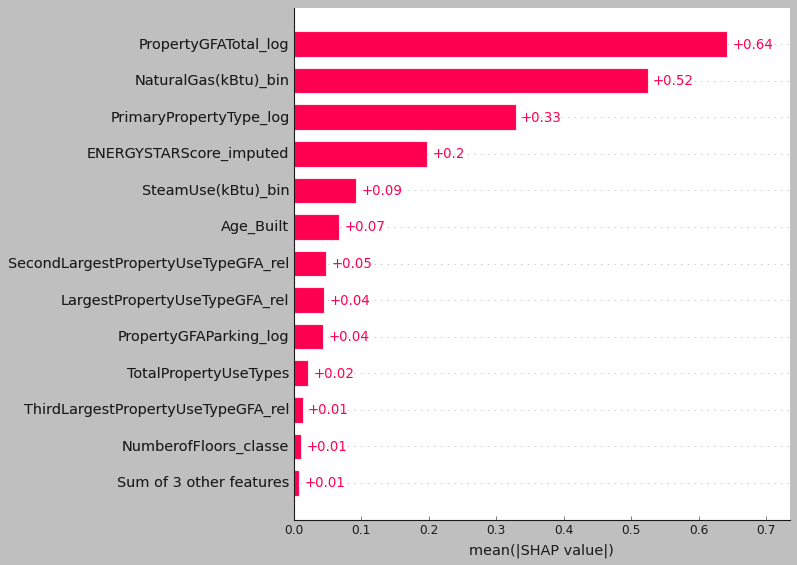

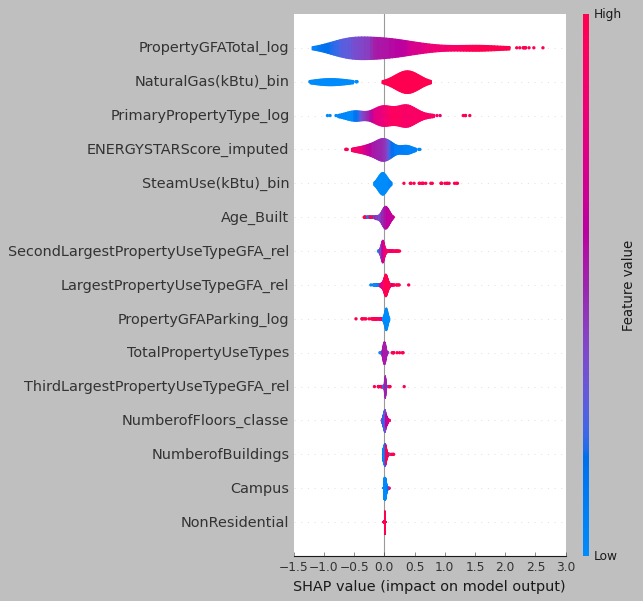

In [72]:
shap.plots.bar(shap_values,max_display=13)
shap.summary_plot(shap_values, plot_type='violin')

In [73]:
X=data.drop(columns=['AgeBuilt_classe','SiteEnergyUse(kBtu)','TotalGHGEmissions','ENERGYSTARScore_imputed'],axis=1)
y=pd.DataFrame()
y['TotalGHGEmissions']=data['TotalGHGEmissions']
X.drop(Drop_list,axis=0,inplace=True)
y.drop(Drop_list,axis=0,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)

train_df=pd.concat([X_train, y_train], axis=1, join='inner')
test_df=pd.concat([X_test, y_test], axis=1, join='inner')

encoder=TargetEncoder()
encoder.fit(train_df['PrimaryPropertyType'],train_df['TotalGHGEmissions'])
    
train_df['PrimaryPropertyType_encoded']=encoder.transform(train_df['PrimaryPropertyType'])
test_df['PrimaryPropertyType_encoded']=encoder.transform(test_df['PrimaryPropertyType']) 
X_train['PrimaryPropertyType_log']=np.log1p(train_df['PrimaryPropertyType_encoded'])     
X_test['PrimaryPropertyType_log']=np.log1p(test_df['PrimaryPropertyType_encoded'])
       
X_train.drop('PrimaryPropertyType',axis=1,inplace=True)
X_test.drop('PrimaryPropertyType',axis=1,inplace=True)
y_train['TotalGHGEmissions_log']=np.log1p(train_df['TotalGHGEmissions'])
y_test['TotalGHGEmissions_log']=np.log1p(test_df['TotalGHGEmissions'])
y_train.drop('TotalGHGEmissions',axis=1,inplace=True)
y_test.drop('TotalGHGEmissions',axis=1,inplace=True)

y_train=np.ravel(y_train)

from xgboost import XGBRegressor

param_grid = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'n_estimators': np.arange(10,150,5),
    'max_depth': np.arange(3, 10,1),
    'subsample': np.arange(0.4, 1.0, 0.01),
    'min_child_weight': np.arange(1,7,1)
}

from sklearn.ensemble import RandomForestRegressor
xg_random_reg = XGBRegressor(objective= "reg:squarederror")

clf = RandomizedSearchCV(xg_random_reg, param_grid, random_state=42)

start_time = timeit.default_timer()
search=clf.fit(X_train,y_train)
elapsed_fit = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_train= search.predict(X_train)
elapsed_train = timeit.default_timer() - start_time

start_time = timeit.default_timer()
predictions_test= search.predict(X_test)
elapsed_test = timeit.default_timer() - start_time

final_model_xgb=search.best_estimator_

print(search.best_params_)
print("MAE Score sur jeu de train: {:.3f}".format(MAE(predictions_train,y_train)))
print("MAE Score sur jeu de test: {:.3f}".format(MAE(predictions_test,y_test)))
print("Temps entrainement: {:.5f}s".format(elapsed_fit))
print("Temps prediction jeu de train: {:.5f}s".format(elapsed_train))
print("Temps prediction jeu de test: {:.5f}s".format(elapsed_test))

models_scores['XGBoost_avec_ENERGYSTARScore']=[MAE(predictions_train,y_train),MAE(predictions_test,y_test),elapsed_fit,elapsed_test]

{'subsample': 0.9500000000000005, 'n_estimators': 75, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.09999999999999999}
MAE Score sur jeu de train: 0.313
MAE Score sur jeu de test: 0.555
Temps entrainement: 3.00978s
Temps prediction jeu de train: 0.00301s
Temps prediction jeu de test: 0.00227s


In [74]:
features=X_train.columns
explainer = shap.Explainer(final_model_xgb, X_train, feature_names=features)
shap_values = explainer(X_test)
print(shap_values.values.shape)

(296, 15)


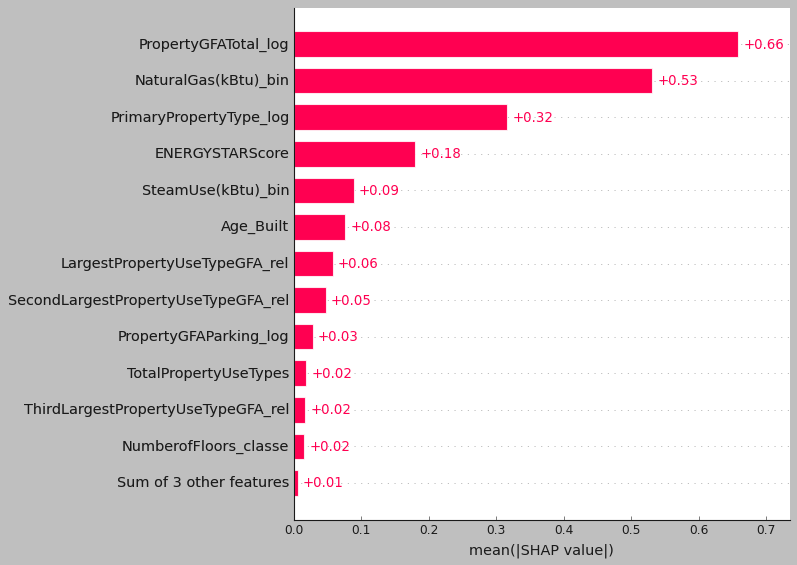

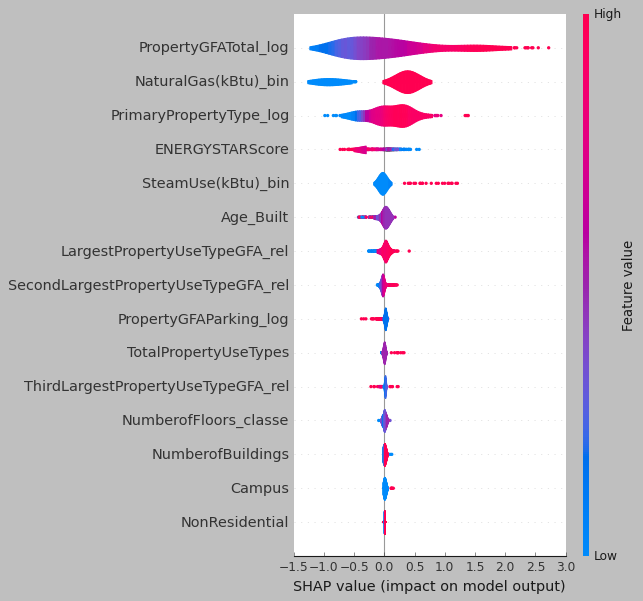

In [75]:
shap.plots.bar(shap_values,max_display=13)
shap.summary_plot(shap_values, plot_type='violin')

MAE_train  MAE_test  Fit_time  Pred_time
XGBoost                                0.350919  0.575764  3.060840   0.001929
XGBoost_red                            0.537544  0.591070  3.102123   0.001754
XGBoost_avec_ENERGYSTARScore           0.313486  0.555490  3.009781   0.002271
XGBoost_avec_ENERGYSTARScore_imputed   0.297412  0.517588  3.521730   0.003203

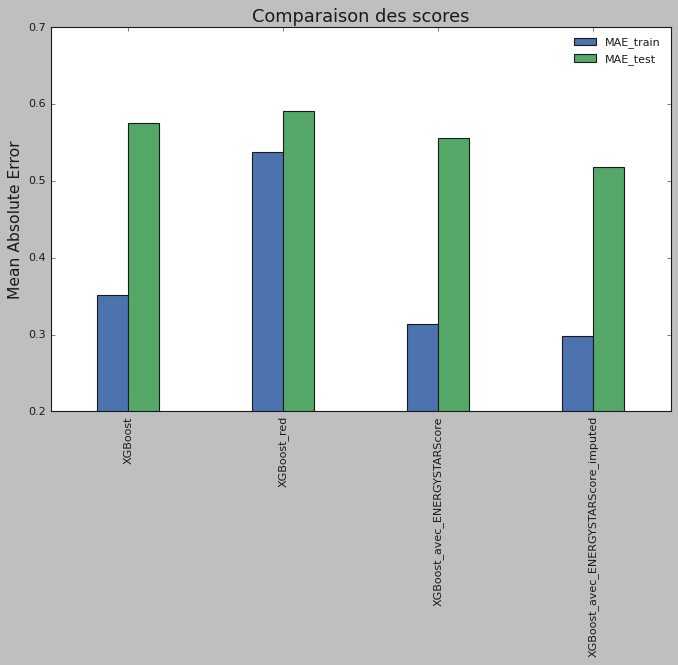

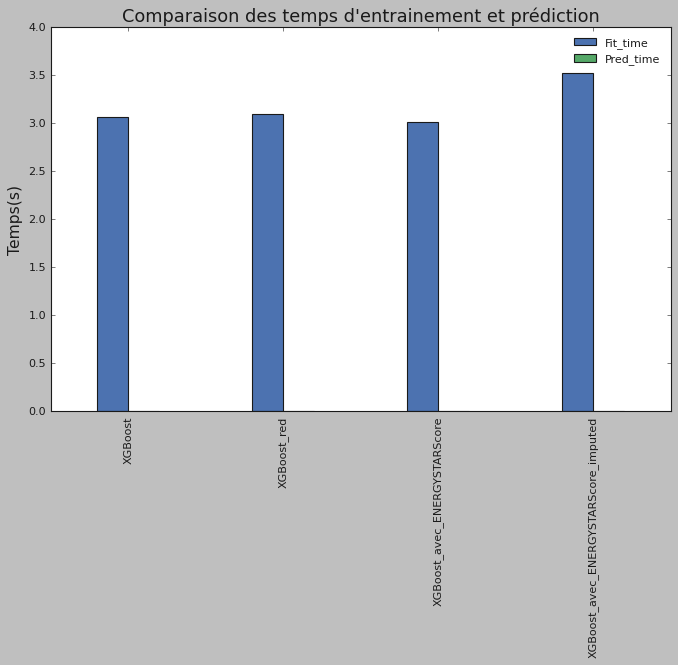

In [76]:
models_scores_df=pd.DataFrame(data=dict((k, models_scores[k]) for k in ['XGBoost','XGBoost_red','XGBoost_avec_ENERGYSTARScore','XGBoost_avec_ENERGYSTARScore_imputed'] if k in models_scores) , index=['MAE_train', 'MAE_test', 'Fit_time', 'Pred_time']).T
display(models_scores_df)
fig=plt.figure(figsize=(10,6))
width=0.2
x = np.arange(len(models_scores_df.values)) 
plt.bar(x - width/2, models_scores_df['MAE_train'].values,width,label='MAE_train')
plt.bar(x + width/2, models_scores_df['MAE_test'].values,width,label='MAE_test')
plt.rcParams.update({'font.size': 6})
plt.xticks(x, models_scores_df.index.values)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.ylabel('Mean Absolute Error',fontsize=14)
plt.title('Comparaison des scores',fontsize=16)
plt.ylim(0.2,0.7)
plt.legend(frameon=False,fontsize=10)
fig=plt.figure(figsize=(10,6))
plt.bar(x - width/2, models_scores_df['Fit_time'].values,width,label='Fit_time')
plt.bar(x + width/2, models_scores_df['Pred_time'].values,width,label='Pred_time')
plt.xticks(x, models_scores_df.index.values)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('Temps(s)',fontsize=14)
plt.title("Comparaison des temps d'entrainement et prédiction",fontsize=16)
plt.ylim(0,4)
plt.legend(frameon=False,fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)